## Imports and set data path

In [1]:
# Imports
import sys
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from scipy.stats import gaussian_kde
import math
import rounders
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=sys.maxsize)
alt.data_transformers.disable_max_rows()


# Set data path here
data_path = 'airfoil_2k_data.h5'


## Explore contents and architecture of .h5 data file

`Data Structure` <br>
The .h5 data file is structured as follows: <br>

|-- root (group, 3 members) <br>
 &emsp;&emsp;	|-- shape (group, 4 members) <br>
 &emsp;&emsp;	&emsp;&emsp;	|-- landmarks (dataset, shape(1830, 1001, 2)) <br>
 &emsp;&emsp;	&emsp;&emsp;	|-- grassmann (dataset, shape(1830, 4)) <br>
 &emsp;&emsp;	&emsp;&emsp;	|-- cst (dataset, shape(1830, 19)) <br>
 &emsp;&emsp;	&emsp;&emsp;	|-- bezier (dataset, shape(1830, 15)) <br>
 &emsp;&emsp;	|-- trans_model (group, 3 members) <br>
 &emsp;&emsp;	&emsp;&emsp;	|-- ReXXXXXXXX (group, 3 members) : for 3M, 6M, and 9M <br>
 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- alpha (dataset, shape(25,)) : coefficient of drag <br>
 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- C_d (dataset, shape(1830, 25)) : coefficient of drag <br>
 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- C_l (dataset, shape(1830, 25)) : coefficient of lift <br>
 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- C_m (dataset, shape(1830, 25)) : moment coefficient <br>
 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- flow_field (group, 1830 members) <br>
 &emsp;&emsp;  	 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- XXXX (group, 7 members) <br>
 &emsp;&emsp;  	 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- x (dataset, shape(n_mesh, 25)) : x location <br>
 &emsp;&emsp;  	 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- y (dataset, shape(n_mesh, 25)) : y location <br>
 &emsp;&emsp;  	 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- rho (dataset, shape(n_mesh, 25)) : density <br>
 &emsp;&emsp;  	 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- rho_u (dataset, shape(n_mesh, 25)) : momentum in x-direction <br>
 &emsp;&emsp;  	 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- rho_v (dataset, shape(n_mesh, 25)) : momentum in y-direction <br>
 &emsp;&emsp;  	 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- e (dataset, shape(n_mesh, 25)) : total energy <br>
 &emsp;&emsp;  	 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- omega (dataset, shape(n_mesh, 25)) : vorticity <br>
 &emsp;&emsp;	|-- turb_model (group, 3 members) <br>
 &emsp;&emsp;	&emsp;&emsp;	|-- ReXXXXXXXX (group, 3 members) : for 3M, 6M, and 9M <br>
 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- alpha (dataset, shape(25,)) : coefficient of drag <br>
 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- C_d (dataset, shape(1830, 25)) : coefficient of drag <br>
 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- C_l (dataset, shape(1830, 25)) : coefficient of lift <br>
 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- C_m (dataset, shape(1830, 25)) : moment coefficient <br>
 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- flow_field (group, 1830 members) <br>
 &emsp;&emsp;  	 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- XXXX (group, 7 members) <br>
 &emsp;&emsp;  	 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- x (dataset, shape(n_mesh, 25)) : x location <br>
 &emsp;&emsp;  	 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- y (dataset, shape(n_mesh, 25)) : y location <br>
 &emsp;&emsp;  	 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- rho (dataset, shape(n_mesh, 25)) : density <br>
 &emsp;&emsp;  	 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- rho_u (dataset, shape(n_mesh, 25)) : momentum in x-direction <br>
 &emsp;&emsp;  	 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- rho_v (dataset, shape(n_mesh, 25)) : momentum in y-direction <br>
 &emsp;&emsp;  	 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- e (dataset, shape(n_mesh, 25)) : total energy <br>
 &emsp;&emsp;  	 &emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	&emsp;&emsp;	|-- omega (dataset, shape(n_mesh, 25)) : vorticity <br>



** The flow fields for the 1,830 airfoils are indexed by zero-padded group names 'XXXX' from 0000 to 1829. The number of mesh points for each airfoil flow field is different and is determined by the airfoil's shape.

In [2]:
# Open file and print the top level group names/keys
# This data set contains 1830 unique airfoil shapes
# The trans_model and turb_model groups represent two different models run by HAM2D, transition and turbulent models
# The shape group contains 4 datasets representing the different parameterizations of the airfoil geometries.
with h5py.File(data_path, 'r') as hf:
    top_groups = [k for k in hf.keys()]
    print(top_groups)


['shape', 'trans_model', 'turb_model']


In [3]:
# Explore contents of the three top level groups

# Both the trans_model and turb_model groups contain 3 members:
#   Re03000000: group, 4 datasets and 1 subgroup
#   Re06000000: group, 4 datasets and 1 subgroup
#   Re09000000: group, 4 datasets and 1 subgroup
#   Each ReXXXXXXXX group contains:
#      alpha: dataset, (25,) array representing the angles of attack captured within the simulations
#      C_d: dataset, (1830, 25) array representing the coeffients of drag for each airfoil geometry across all angles of attack
#      C_l: dataset, (1830, 25) array representing the coeffients of lift for each airfoil geometry across all angles of attack
#      C_m: dataset, (1830, 25) array representing the coeffients of moment for each airfoil geometry across all angles of attack
#      flow_field: group containing 1830 subgroups associated with each airfoil and containing 7 datasets:
#         x: (n_mesh, 25) array representing the x locations of the mesh points
#         y: (n_mesh, 25) array representing the y locations of the mesh points
#         rho: (n_mesh, 25) array representing the flow density at each mesh point
#         rho_u: (n_mesh, 25) array representing the flow momentum in the x-direction at each mesh point
#         rho_v: (n_mesh, 25) array representing the flow momentum in the y-direction at each mesh point
#         e: (n_mesh, 25) array representing the total energy in the flow at each mesh point
#         omega: (n_mesh, 25) array representing the flow vorticity at each mesh point
#      Note that the number of mesh point n_mesh can be different for each airfoil
# The shape group contains 4 members representing different paramerizations of the airfoil geometry:
#   landmarks:  dataset (1830, 1001, 2) NumPy array representing the geometries of each airfoil via (x, y) landmarks.
#   grassmann:  dataset (1830, 6) NumPy array representing the geometries of each airfoil via Grassmann.
#   cst:        dataset (1830, 19) NumPy array representing the geometries of each airfoil via Class-Shape Transformation.
#   bezier:     dataset (1830, 15) NumPy array representing the goemetries of each airfoil via a Bezier curve

with h5py.File(data_path, 'r') as hf:
    for name in top_groups:
        print('-------------------------------------------------')
        print('Group Name:', name)
        print('Group Info:', hf[name])
        print('')
        
        print('Members:')
        for key in list(hf[name].keys()):
            print(hf[name][key])
        if 'model' in name:
            print('')
            print('Sub-Members of Re0XXXXXXX groups:')
            for key in list(hf[name]['Re03000000'].keys()):
                if 'flow' in key:
                    for i in range(3):
                        print('Flow Field data for airfoil {:04d}'.format(i))
                        for flow_key in hf[name]['Re03000000'][key]['{:04d}'.format(i)].keys():
                            print('  ', hf[name]['Re03000000'][key]['{:04d}'.format(i)][flow_key])    
                else:
                    print(hf[name]['Re03000000'][key])
                
    print('-------------------------------------------------')
    

-------------------------------------------------
Group Name: shape
Group Info: <HDF5 group "/shape" (4 members)>

Members:
<HDF5 dataset "bezier": shape (1830, 15), type "<f8">
<HDF5 dataset "cst": shape (1830, 19), type "<f8">
<HDF5 dataset "grassmann": shape (1830, 6), type "<f8">
<HDF5 dataset "landmarks": shape (1830, 1001, 2), type "<f8">
-------------------------------------------------
Group Name: trans_model
Group Info: <HDF5 group "/trans_model" (3 members)>

Members:
<HDF5 group "/trans_model/Re03000000" (5 members)>
<HDF5 group "/trans_model/Re06000000" (5 members)>
<HDF5 group "/trans_model/Re09000000" (5 members)>

Sub-Members of Re0XXXXXXX groups:
<HDF5 dataset "C_d": shape (1830, 25), type "<f8">
<HDF5 dataset "C_l": shape (1830, 25), type "<f8">
<HDF5 dataset "C_m": shape (1830, 25), type "<f8">
<HDF5 dataset "alpha": shape (25,), type "<i8">
Flow Field data for airfoil 0000
   <HDF5 dataset "e": shape (53018, 25), type "<f8">
   <HDF5 dataset "omega": shape (53018, 25

## Explore Airfoil Shapes & Parameterizations

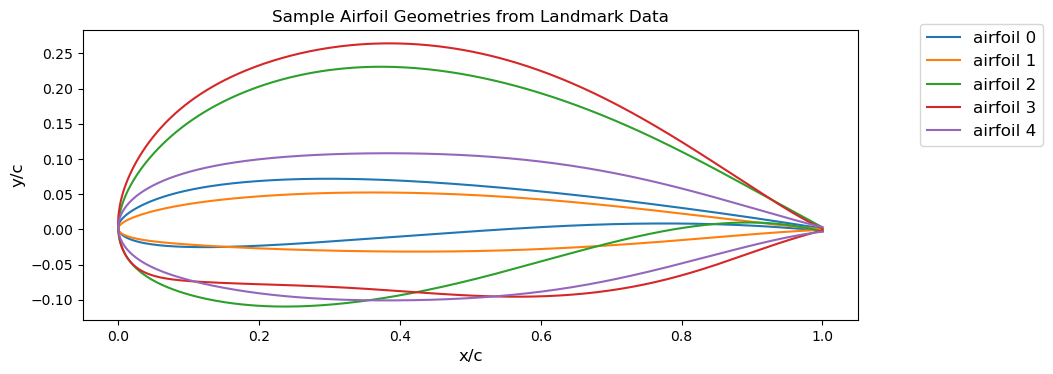

In [4]:
# Visualize the first 5 airfoil geometries using the landmarks dataset
plt.figure(figsize=(10, 6))
with h5py.File(data_path, 'r') as hf:
    landmarks = hf['shape']['landmarks'][()]
    af_shape_count = 0
    for landmark in landmarks[0:5]:
        plt.plot(landmark[:, 0], landmark[:, 1], label='airfoil {}'.format(af_shape_count))
        af_shape_count += 1
plt.xlabel('x/c', fontsize=12)
plt.ylabel('y/c', fontsize=12)
plt.gca().set_aspect(1.)
plt.legend(bbox_to_anchor=(1.25, 1.05), fontsize=12)
plt.title('Sample Airfoil Geometries from Landmark Data')
plt.show()

In [5]:
# Capture reduced dimensionality parameterizations as objects and print shapes
with h5py.File(data_path, 'r') as hf:
    grassmann = hf['shape']['grassmann'][()]
    print('Grassmann')
    print(grassmann.shape)
    
    cst = hf['shape']['cst'][()]
    print('CST')
    print(cst.shape)
    
    bezier = hf['shape']['bezier'][()]
    print('Bezier')
    print(bezier.shape)

Grassmann
(1830, 6)
CST
(1830, 19)
Bezier
(1830, 15)


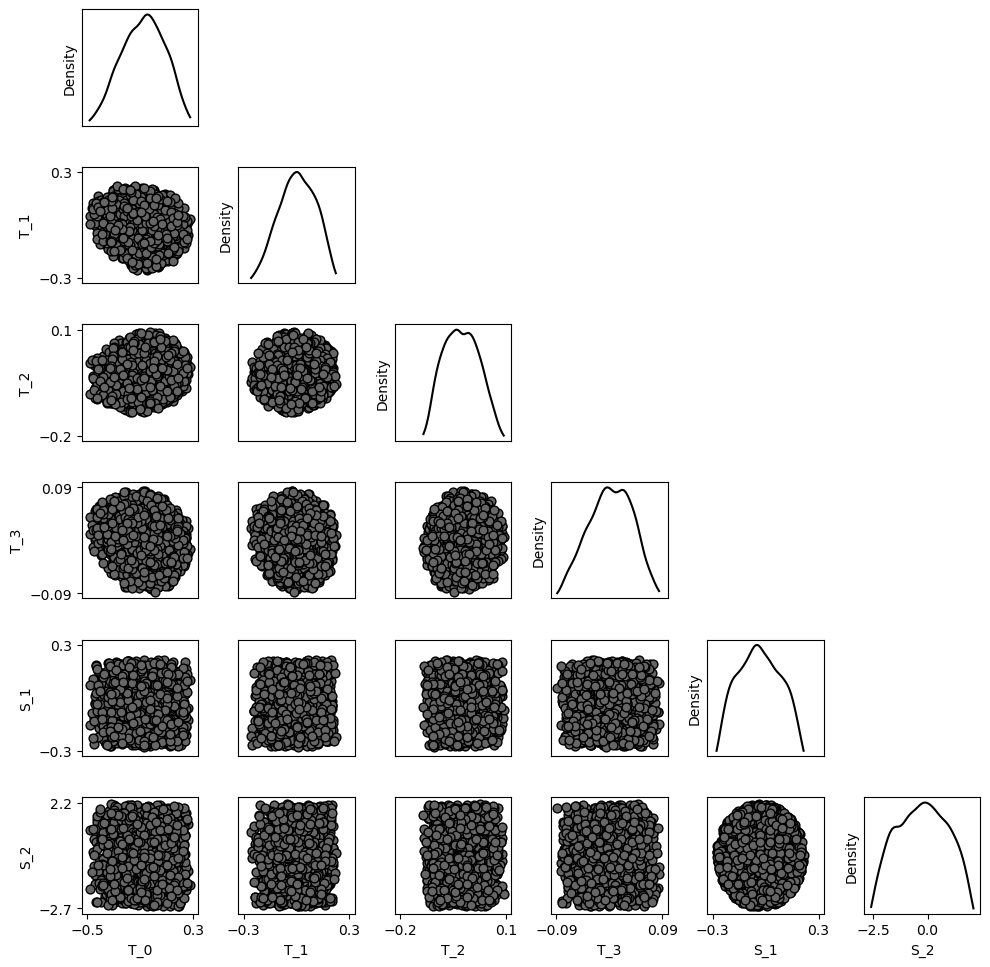

In [6]:
## Visualize distributions of Grassmann parameters
# Capture number of parameters in grassmann representation
m = grassmann.shape[1]
# Create list to hold upper and lower limits for visualizations
grassmann_limits = []
for i in range(m):
    # Capture min and max values in each grassmann parameter across all airfoils
    lower = grassmann[:,i].min()
    upper = grassmann[:,i].max()
    # determine position of first non-zero digit after the decimal place, perform ceiling and floor rounding to that precision
    lower = rounders.floor(lower,(abs(int(math.log10(abs(lower))))+1))
    upper = rounders.ceil(upper,(abs(int(math.log10(abs(upper))))+1))
    # append parameter lower and upper limits to list
    grassmann_limits.append([lower,upper])

# Create labels for grassmann parameters
grassmann_labels = ['T_{}'.format(i) for i in range(m-2)]
grassmann_labels.extend(['S_1','S_2'])

# Plot marginal distributions of the grassmann data
plt.figure(figsize=(10,10))
for i in range(m):
    for j in range(i+1):
        plt.subplot(m, m, (m*i)+j+1)
        if i == j:
            vals = np.linspace(grassmann[:,i].min(), grassmann[:,i].max())
            kde = gaussian_kde(grassmann[:,i])
            plt.plot(vals,kde(vals),'k')
            plt.xlim(grassmann_limits[i][0]-0.05*np.ptp(grassmann_limits[i]),
                     grassmann_limits[i][-1]+0.05*np.ptp(grassmann_limits[i]))
            plt.yticks([])
            plt.ylabel('Density')
        
            if i == (m-1):
                plt.xlabel(grassmann_labels[j], fontsize=10)
            else:
                plt.xticks([])

        else:
            plt.scatter(grassmann[:,j], grassmann[:,i], s=40, c=[[0.4,0.4,0.4]], edgecolor='k')
            plt.xticks(grassmann_limits[j])
            plt.yticks(grassmann_limits[i])
            
            if i == (m-1):
                plt.xlabel(grassmann_labels[j], fontsize=10)
            else:
                plt.xticks([])
            if j == 0:
                plt.ylabel(grassmann_labels[i], fontsize=10)
            else:
                plt.yticks([])
            plt.xlim(grassmann_limits[j][0]-0.05*np.ptp(grassmann_limits[j]), 
                     grassmann_limits[j][-1]+0.05*np.ptp(grassmann_limits[j]))
            plt.ylim(grassmann_limits[i][0]-0.05*np.ptp(grassmann_limits[i]), 
                     grassmann_limits[i][-1]+0.05*np.ptp(grassmann_limits[i]))

        xlim = plt.gca().get_xlim()
        ylim = plt.gca().get_ylim()
        plt.gca().set_aspect((xlim[1] - xlim[0])/(ylim[1] - ylim[0]))
plt.tight_layout()
plt.show()


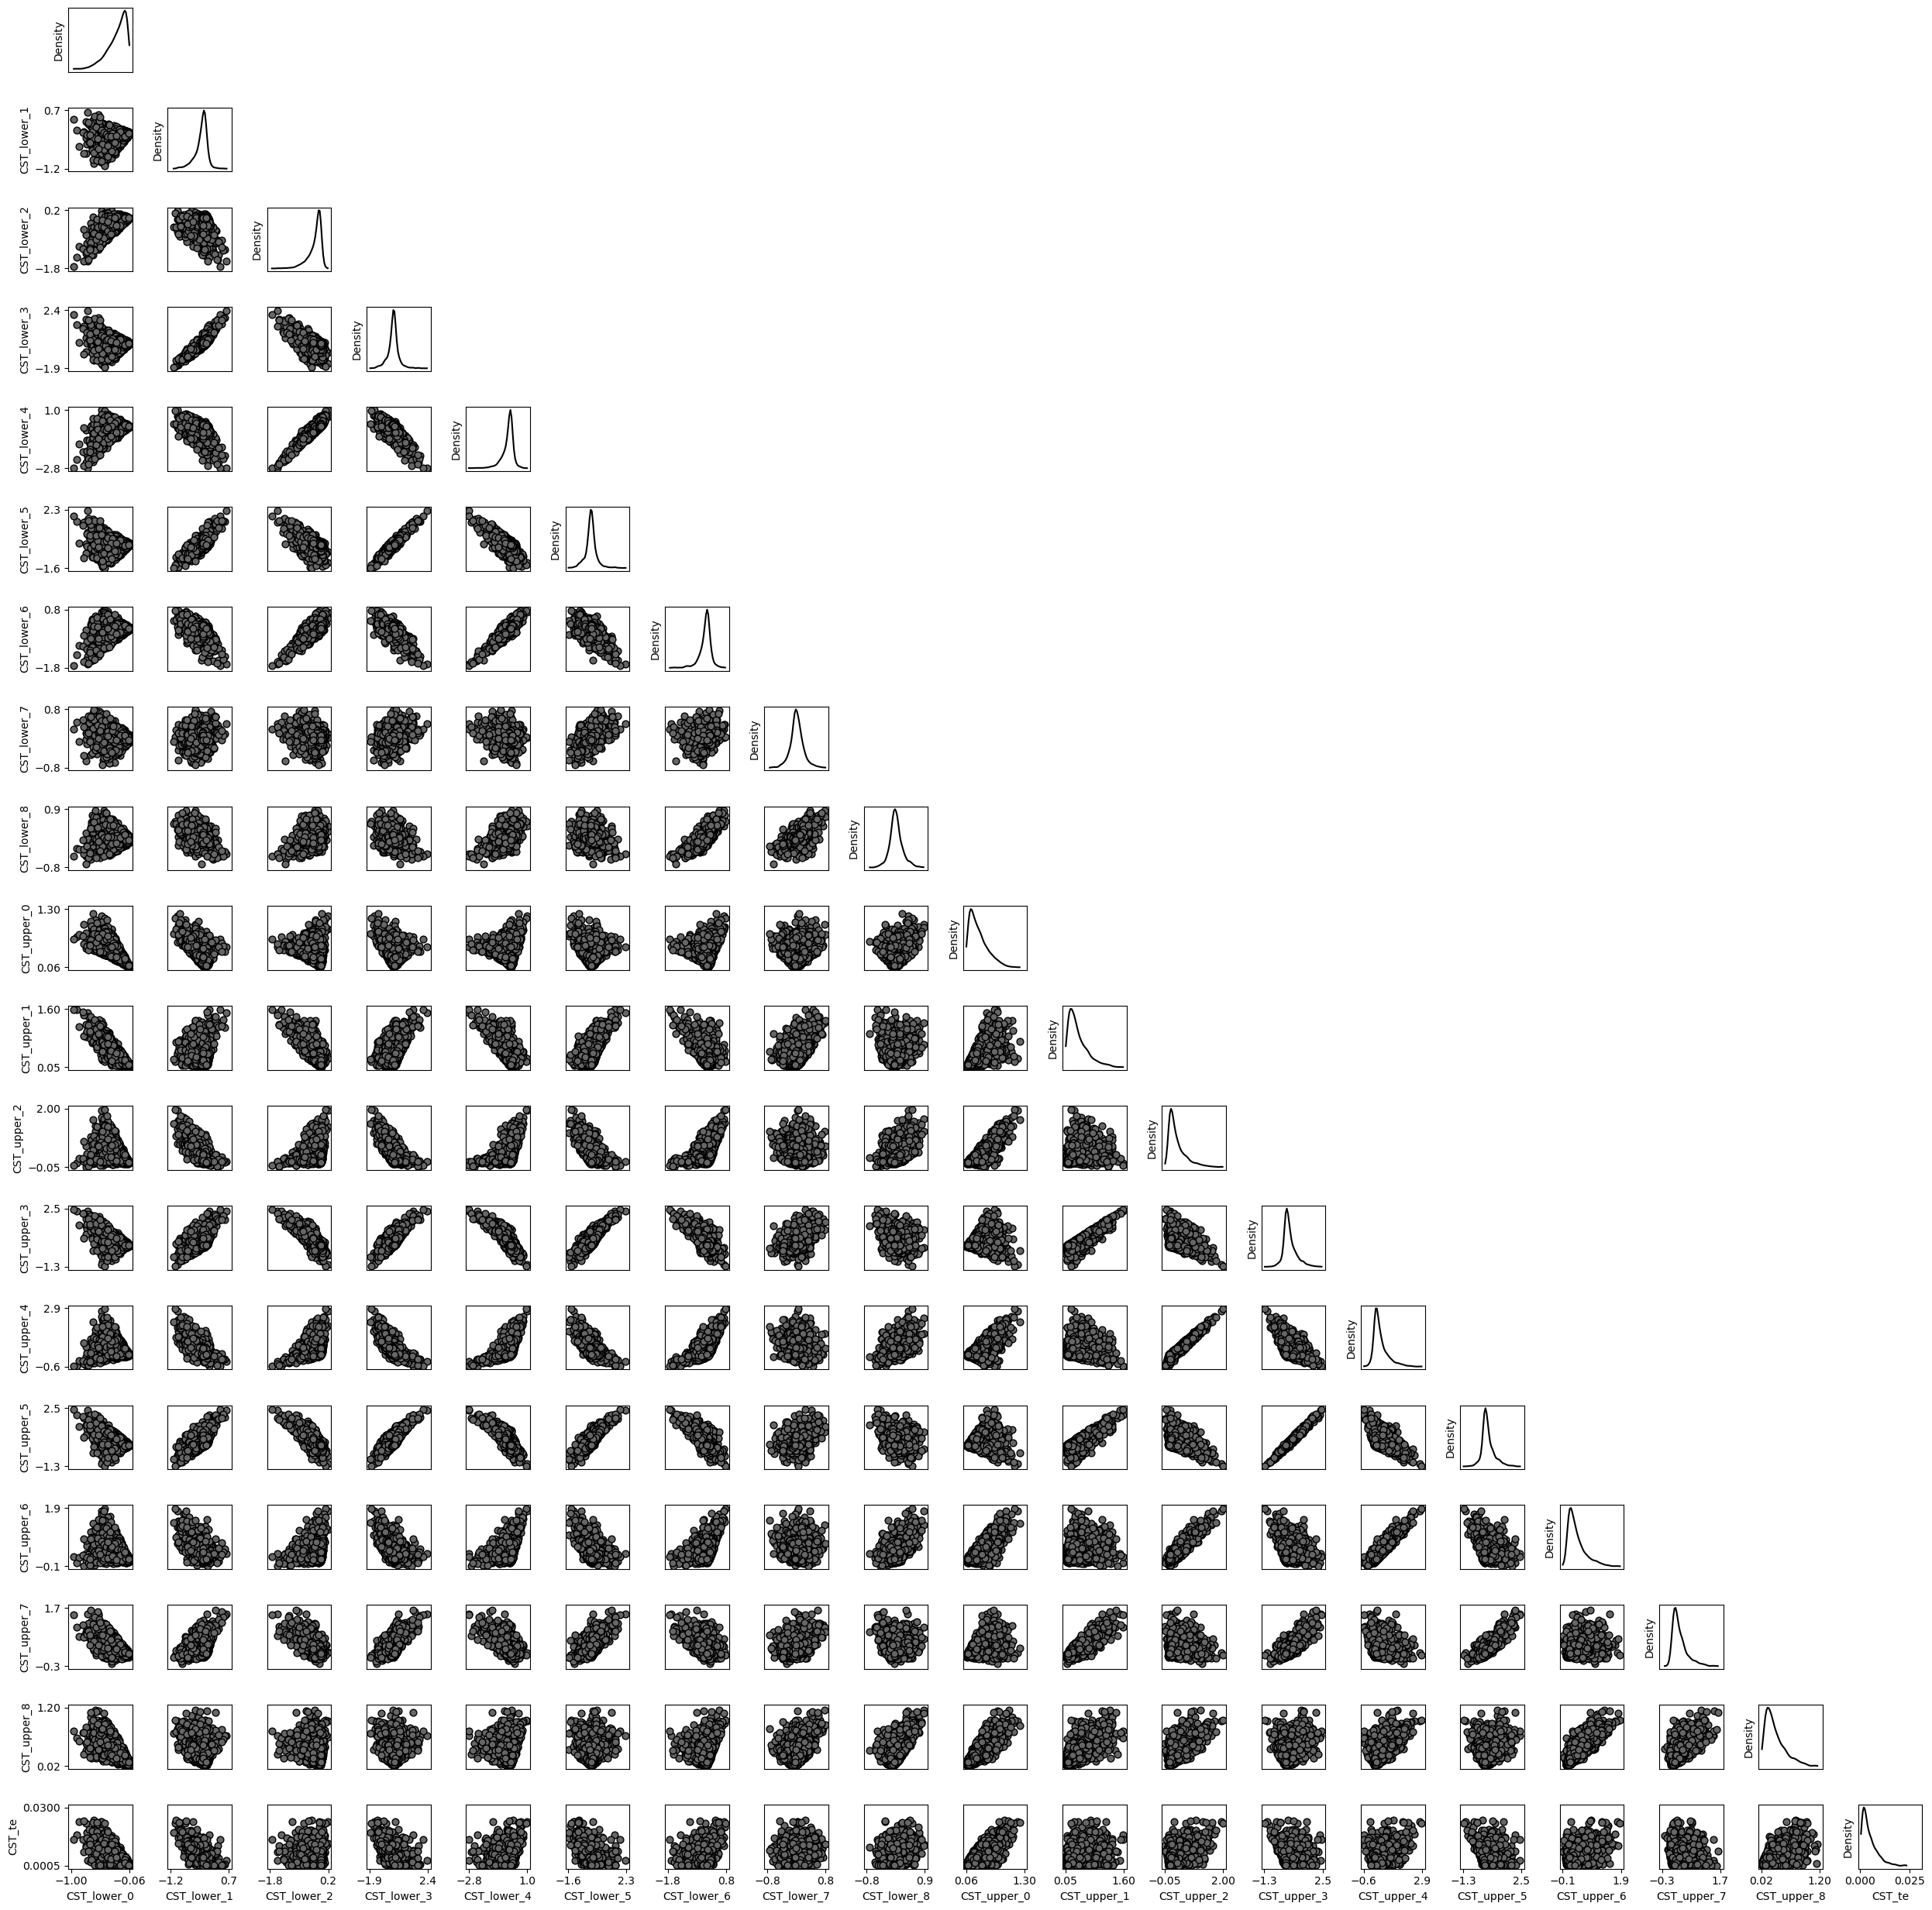

In [7]:
## Visualize distributions of CST parameters
# Capture number of parameters in CST representation
m = cst.shape[1]
# Create list to hold upper and lower limits for visualizations
cst_limits = []
for i in range(m):
    # Capture min and max values in each CST parameter across all airfoils
    lower = cst[:,i].min()
    upper = cst[:,i].max()
    # determine position of first non-zero digit after the decimal place, perform ceiling and floor rounding to that precision
    lower = rounders.floor(lower,(abs(int(math.log10(abs(lower))))+1))
    upper = rounders.ceil(upper,(abs(int(math.log10(abs(upper))))+1))
    # append parameter lower and upper limits to list
    cst_limits.append([lower,upper])

# Create labels for CST parameters
cst_labels = ['CST_lower_{}'.format(i) for i in range(int((m-1)/2))]
cst_labels.extend(['CST_upper_{}'.format(i) for i in range(int((m-1)/2))])
cst_labels.extend(['CST_te'])

# Plot marginal distributions of the CST data
plt.figure(figsize=(25,25))
for i in range(m):
    for j in range(i+1):
        plt.subplot(m, m, (m*i)+j+1)
        if i == j:
            vals = np.linspace(cst[:,i].min(), cst[:,i].max())
            kde = gaussian_kde(cst[:,i])
            plt.plot(vals,kde(vals),'k')
            plt.xlim(cst_limits[i][0]-0.05*np.ptp(cst_limits[i]),
                     cst_limits[i][-1]+0.05*np.ptp(cst_limits[i]))
            plt.yticks([])
            plt.ylabel('Density')
        
            if i == (m-1):
                plt.xlabel(cst_labels[j], fontsize=10)
            else:
                plt.xticks([])

        else:
            plt.scatter(cst[:,j], cst[:,i], s=40, c=[[0.4,0.4,0.4]], edgecolor='k')
            plt.xticks(cst_limits[j])
            plt.yticks(cst_limits[i])
            
            if i == (m-1):
                plt.xlabel(cst_labels[j], fontsize=10)
            else:
                plt.xticks([])
            if j == 0:
                plt.ylabel(cst_labels[i], fontsize=10)
            else:
                plt.yticks([])
            plt.xlim(cst_limits[j][0]-0.05*np.ptp(cst_limits[j]), 
                     cst_limits[j][-1]+0.05*np.ptp(cst_limits[j]))
            plt.ylim(cst_limits[i][0]-0.05*np.ptp(cst_limits[i]), 
                     cst_limits[i][-1]+0.05*np.ptp(cst_limits[i]))

        xlim = plt.gca().get_xlim()
        ylim = plt.gca().get_ylim()
        plt.gca().set_aspect((xlim[1] - xlim[0])/(ylim[1] - ylim[0]))
plt.tight_layout()
plt.show()


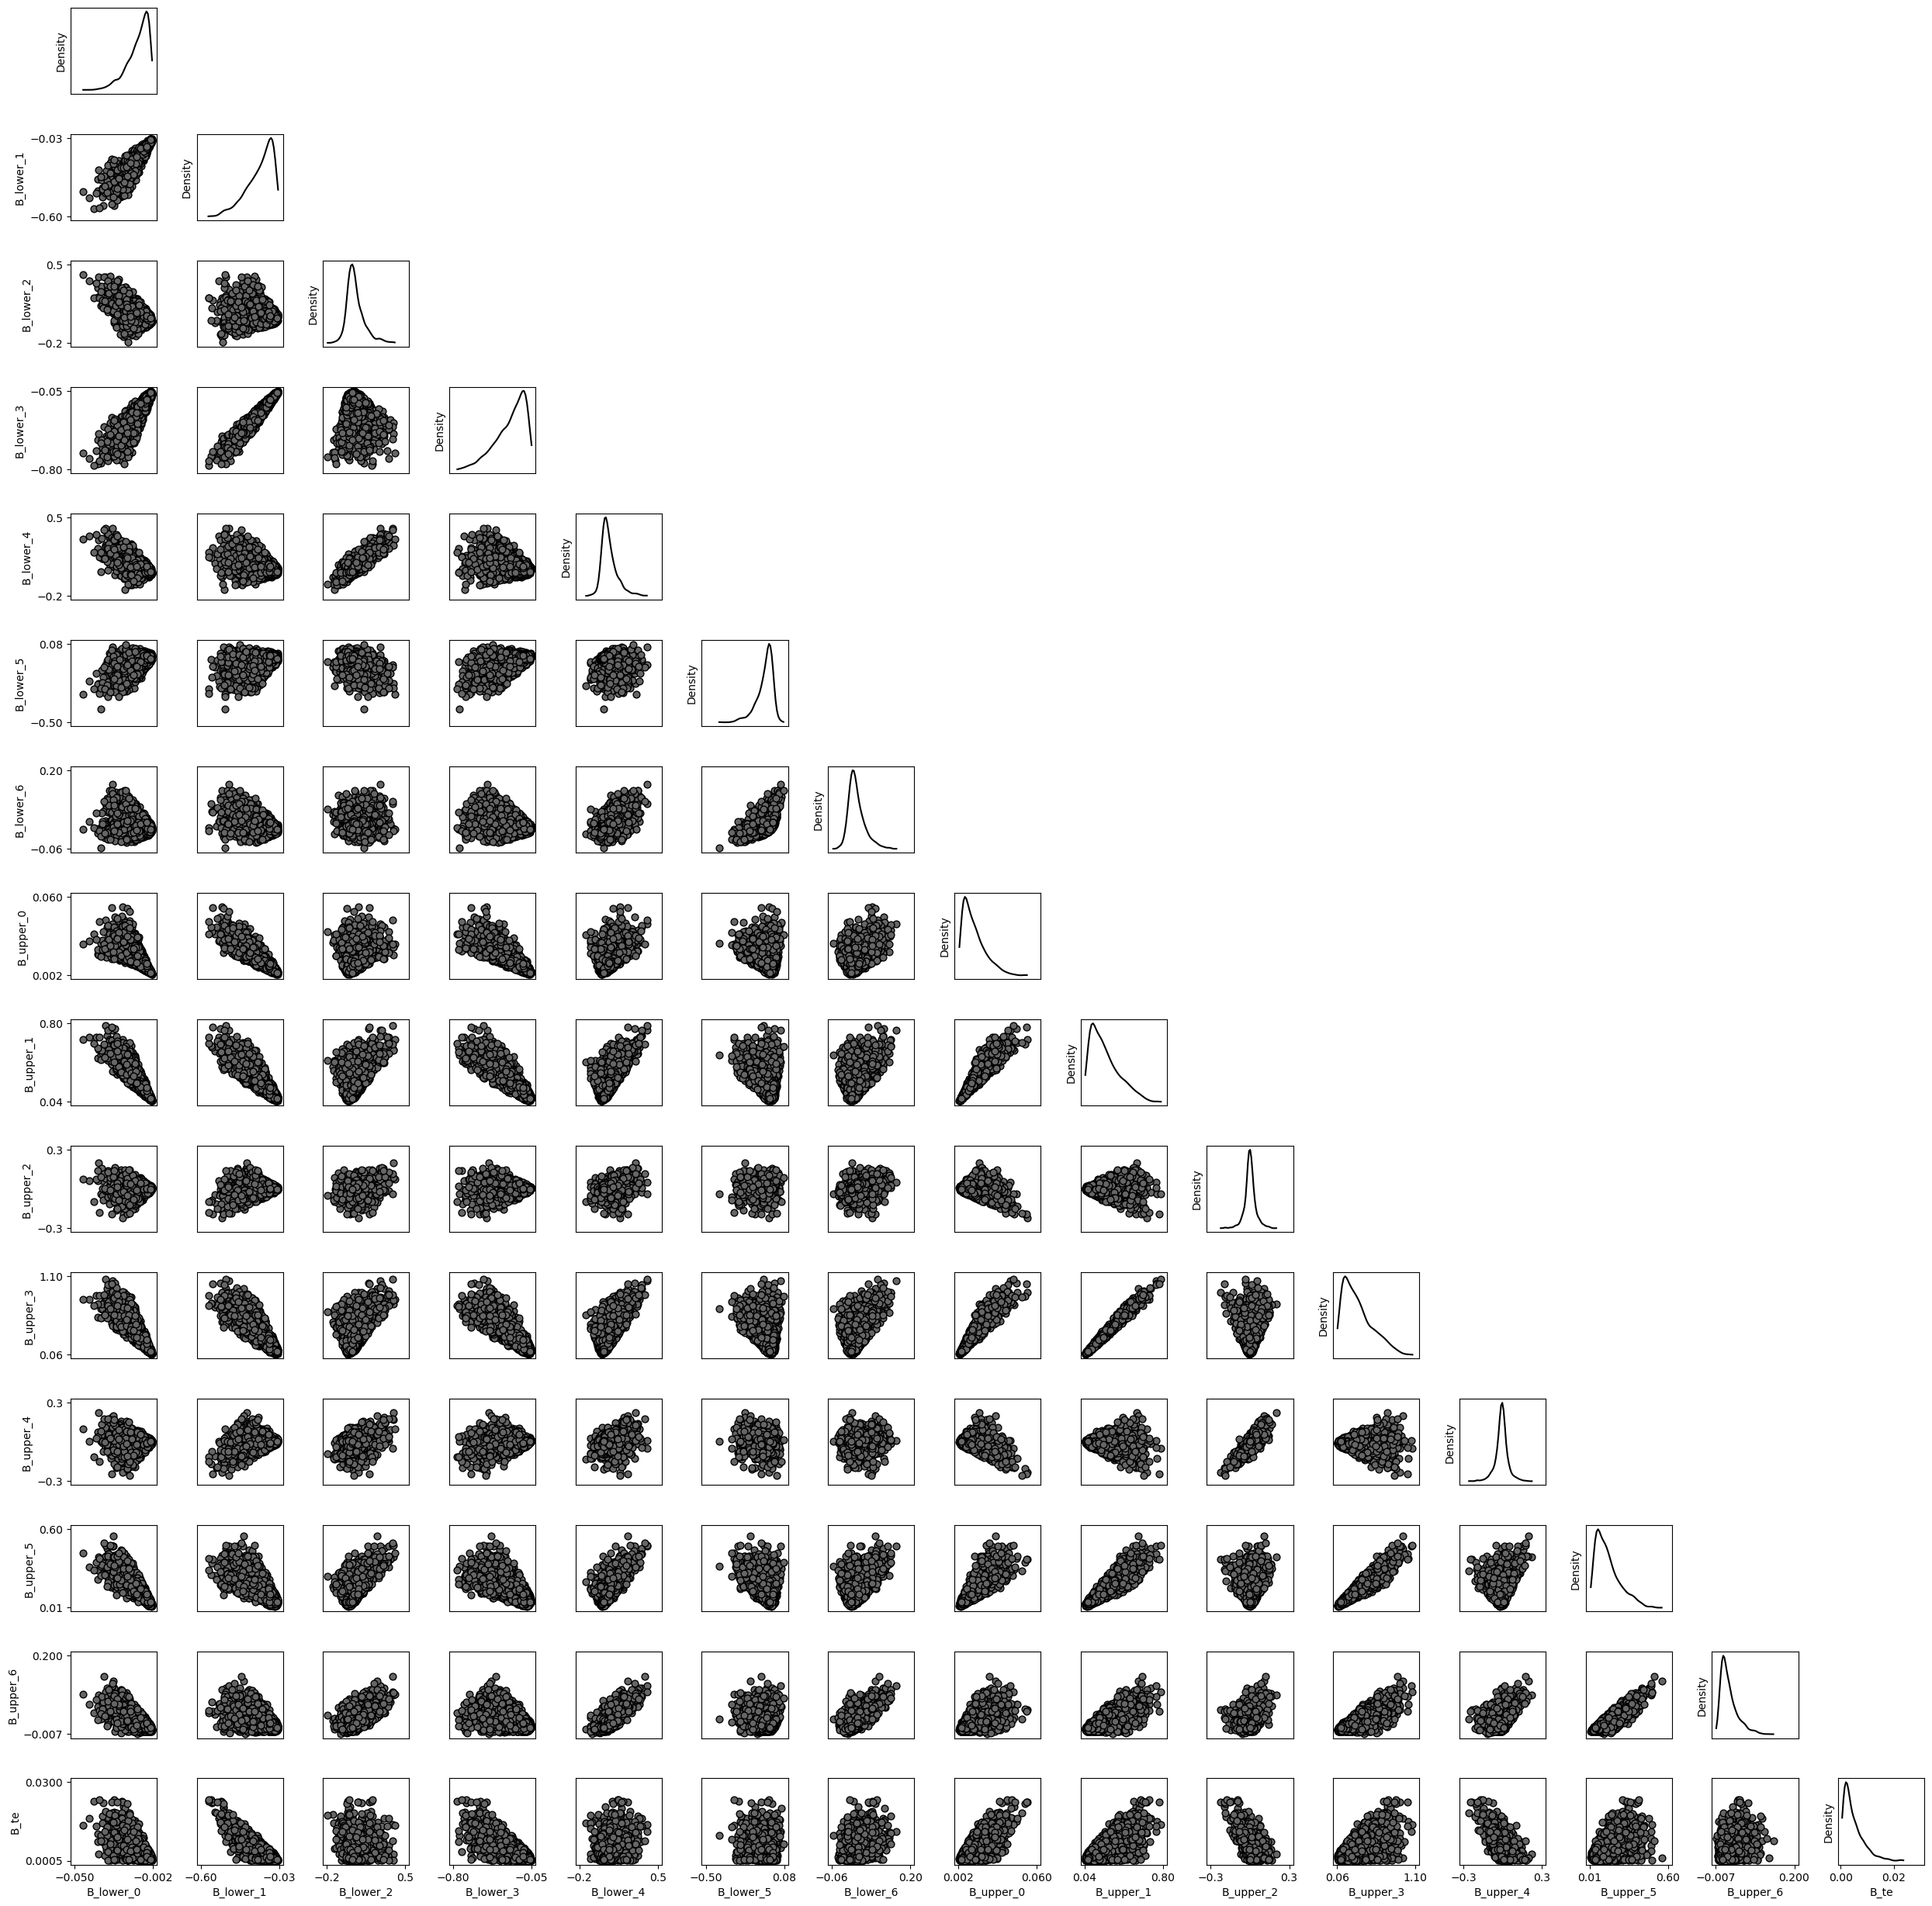

In [8]:
## Visualize distributions of Bezier curve parameters
# Capture number of parameters in bezier representation
m = bezier.shape[1]
# Create list to hold upper and lower limits for visualizations
bezier_limits = []
for i in range(m):
    # Capture min and max values in each bezier parameter across all airfoils
    lower = bezier[:,i].min()
    upper = bezier[:,i].max()
    # determine position of first non-zero digit after the decimal place, perform ceiling and floor rounding to that precision
    lower = rounders.floor(lower,(abs(int(math.log10(abs(lower))))+1))
    upper = rounders.ceil(upper,(abs(int(math.log10(abs(upper))))+1))
    # append parameter lower and upper limits to list
    bezier_limits.append([lower,upper])

# Create labels for bezier parameters
bezier_labels = ['B_lower_{}'.format(i) for i in range(int((m-1)/2))]
bezier_labels.extend(['B_upper_{}'.format(i) for i in range(int((m-1)/2))])
bezier_labels.extend(['B_te'])

# Plot marginal distributions of the bezier data
plt.figure(figsize=(25,25))
for i in range(m):
    for j in range(i+1):
        plt.subplot(m, m, (m*i)+j+1)
        if i == j:
            vals = np.linspace(bezier[:,i].min(), bezier[:,i].max())
            kde = gaussian_kde(bezier[:,i])
            plt.plot(vals,kde(vals),'k')
            plt.xlim(bezier_limits[i][0]-0.05*np.ptp(bezier_limits[i]),
                     bezier_limits[i][-1]+0.05*np.ptp(bezier_limits[i]))
            plt.yticks([])
            plt.ylabel('Density')
        
            if i == (m-1):
                plt.xlabel(bezier_labels[j], fontsize=10)
            else:
                plt.xticks([])

        else:
            plt.scatter(bezier[:,j], bezier[:,i], s=40, c=[[0.4,0.4,0.4]], edgecolor='k')
            plt.xticks(bezier_limits[j])
            plt.yticks(bezier_limits[i])
            
            if i == (m-1):
                plt.xlabel(bezier_labels[j], fontsize=10)
            else:
                plt.xticks([])
            if j == 0:
                plt.ylabel(bezier_labels[i], fontsize=10)
            else:
                plt.yticks([])
            plt.xlim(bezier_limits[j][0]-0.05*np.ptp(bezier_limits[j]), 
                     bezier_limits[j][-1]+0.05*np.ptp(bezier_limits[j]))
            plt.ylim(bezier_limits[i][0]-0.05*np.ptp(bezier_limits[i]), 
                     bezier_limits[i][-1]+0.05*np.ptp(bezier_limits[i]))

        xlim = plt.gca().get_xlim()
        ylim = plt.gca().get_ylim()
        plt.gca().set_aspect((xlim[1] - xlim[0])/(ylim[1] - ylim[0]))
plt.tight_layout()
plt.show()


## Airfoil Shape and Aerodynamic Properties

In [9]:
# Parse the landmark datasets and extract thickness along the chord and camber line 
with h5py.File(data_path, 'r') as hf:
    landmarks = hf['shape']['landmarks'][()]
    N_airfoils = landmarks.shape[0]
    
    # Calculate thickness at each x_c step except for the leading edge (x_c~0.0, index 500, axis=1)
    thickness_arr_2d = abs(landmarks[:,501:,1] - np.flip(landmarks[:,:500,1],axis=1))
    
    # Calculate camber / midpoint at each x_c step
    camber_arr_2d = (landmarks[:,501:,1] + np.flip(landmarks[:,:500,1],axis=1))/2
    
    # Create numpy array to represent x_c values at each thickness/camber step (0.002 increments between 0.002 and 1.0 inclusive)
    x_c_arr = np.resize(np.arange(0.002,1.002,0.002), thickness_arr_2d.shape[0]*500)

    # Reshape thickness array such that each row is one thickness value totaling 1830 airfoils * 500 landmarks per foil, output shape = (915500,1)
    thickness_arr_1d = np.reshape(thickness_arr_2d, (N_airfoils*500,1))
    
    # Insert x_c value indexes in 0th column --> output shape = (915500,2)
    thickness_arr_1d = np.insert(thickness_arr_1d, 0, x_c_arr, axis=1)

    # Reshape camber array such that each row is one camber value totaling 1830 airfoils * 500 landmarks per foil (915500,1)
    camber_arr_1d = np.reshape(camber_arr_2d, (N_airfoils*500,1))
    
    # Insert x_c value indexes in first 0th column --> (915500,2) output
    camber_arr_1d = np.insert(camber_arr_1d, 0, x_c_arr, axis=1)

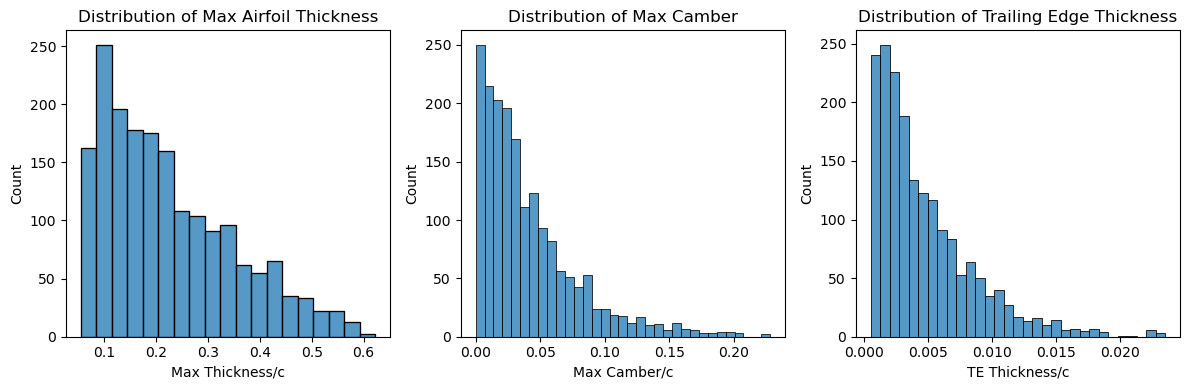

In [10]:
# Visualize distribution of maximum thickness/maximum camber/trailing edge thickness across airfoils
plt.figure(figsize=(12, 4))

plt.subplot(131)
ax = sns.histplot(data=np.max(thickness_arr_2d, axis=1), stat='count')
ax.set_title('Distribution of Max Airfoil Thickness')
ax.set(xlabel='Max Thickness/c')

plt.subplot(132)
ax = sns.histplot(data=np.max(camber_arr_2d, axis=1), stat='count')
ax.set_title('Distribution of Max Camber')
ax.set(xlabel='Max Camber/c')

plt.subplot(133)
ax = sns.histplot(data=thickness_arr_2d[:,499], stat='count')
ax.set_title('Distribution of Trailing Edge Thickness')
ax.set(xlabel='TE Thickness/c')

plt.tight_layout()
plt.show()

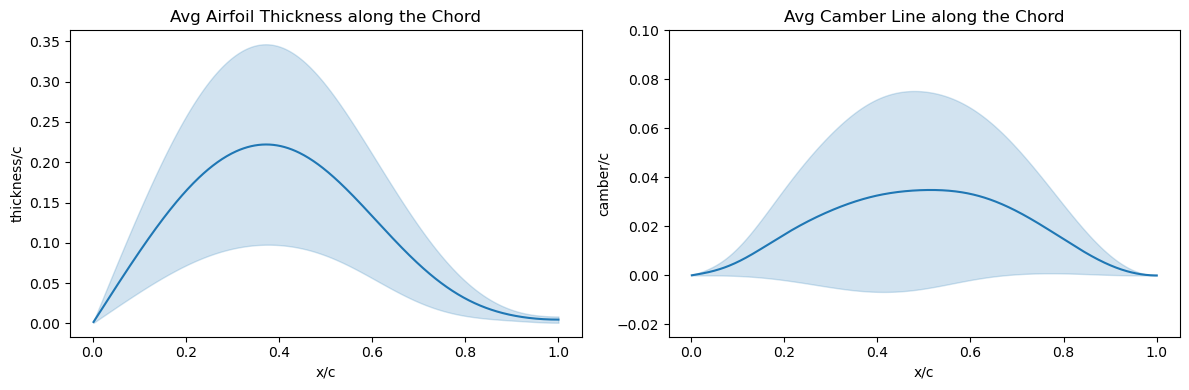

In [11]:
# Visualize average thickness along the chord and standard deviation across all airfoils
plt.figure(figsize=(12, 4))

plt.subplot(121)
ax = sns.lineplot(data=thickness_arr_1d, x=thickness_arr_1d[:,0], y=thickness_arr_1d[:,1], 
                  errorbar='sd', n_boot=(len(thickness_arr_1d)))
ax.set(xlabel='x/c', ylabel='thickness/c')
ax.set_title('Avg Airfoil Thickness along the Chord')

plt.subplot(122)
ax = sns.lineplot(data=camber_arr_1d, x=camber_arr_1d[:,0], y=camber_arr_1d[:,1], 
                  errorbar='sd', n_boot=(len(camber_arr_1d)))
ax.set(xlabel='x/c', ylabel='camber/c')
ax.set_title('Avg Camber Line along the Chord')
ax.set_ylim(ymin=-0.025, ymax=0.10)

plt.tight_layout()
plt.show()

In [12]:
# Parse the coefficients of lift/drag/momentum and angle of attack datasets
with h5py.File(data_path, 'r') as hf:
    landmarks = hf['shape']['landmarks'][()]
    N_airfoils = landmarks.shape[0]
    
    # capture angles of attack
    aoa = hf['trans_model/Re03000000/alpha'][()]
    aoa_long = np.resize(aoa, N_airfoils*25)

    # capture drag, lift, moment datasets for each Re number in the trans_model group
    cd_trans_Re3_2d = hf['trans_model/Re03000000/C_d'][()]
    cl_trans_Re3_2d = hf['trans_model/Re03000000/C_l'][()]
    cm_trans_Re3_2d = hf['trans_model/Re03000000/C_m'][()]

    cd_trans_Re6_2d = hf['trans_model/Re06000000/C_d'][()]
    cl_trans_Re6_2d = hf['trans_model/Re06000000/C_l'][()]
    cm_trans_Re6_2d = hf['trans_model/Re06000000/C_m'][()]

    cd_trans_Re9_2d = hf['trans_model/Re09000000/C_d'][()]
    cl_trans_Re9_2d = hf['trans_model/Re09000000/C_l'][()]
    cm_trans_Re9_2d = hf['trans_model/Re09000000/C_m'][()]

    # capture drag, lift, moment datasets for each Re number in the turb_model group
    cd_turb_Re3_2d = hf['turb_model/Re03000000/C_d'][()]
    cl_turb_Re3_2d = hf['turb_model/Re03000000/C_l'][()]
    cm_turb_Re3_2d = hf['turb_model/Re03000000/C_m'][()]

    cd_turb_Re6_2d = hf['turb_model/Re06000000/C_d'][()]
    cl_turb_Re6_2d = hf['turb_model/Re06000000/C_l'][()]
    cm_turb_Re6_2d = hf['turb_model/Re06000000/C_m'][()]

    cd_turb_Re9_2d = hf['turb_model/Re09000000/C_d'][()]
    cl_turb_Re9_2d = hf['turb_model/Re09000000/C_l'][()]
    cm_turb_Re9_2d = hf['turb_model/Re09000000/C_m'][()]

    # Reshape coefficient arrays such that each row is one coeff value totaling 1830 airfoils * 25 angles of attack, = (45775,1) arrays
    cd_trans_Re3_1d = np.reshape(cd_trans_Re3_2d, (N_airfoils*25,1))
    cd_trans_Re3_1d = np.insert(cd_trans_Re3_1d, 0, aoa_long, axis=1)
    cl_trans_Re3_1d = np.reshape(cl_trans_Re3_2d, (N_airfoils*25,1))
    cl_trans_Re3_1d = np.insert(cl_trans_Re3_1d, 0, aoa_long, axis=1)
    cm_trans_Re3_1d = np.reshape(cm_trans_Re3_2d, (N_airfoils*25,1))
    cm_trans_Re3_1d = np.insert(cm_trans_Re3_1d, 0, aoa_long, axis=1)

    cd_trans_Re6_1d = np.reshape(cd_trans_Re6_2d, (N_airfoils*25,1))
    cd_trans_Re6_1d = np.insert(cd_trans_Re6_1d, 0, aoa_long, axis=1)
    cl_trans_Re6_1d = np.reshape(cl_trans_Re6_2d, (N_airfoils*25,1))
    cl_trans_Re6_1d = np.insert(cl_trans_Re6_1d, 0, aoa_long, axis=1)
    cm_trans_Re6_1d = np.reshape(cm_trans_Re6_2d, (N_airfoils*25,1))
    cm_trans_Re6_1d = np.insert(cm_trans_Re6_1d, 0, aoa_long, axis=1)
    
    cd_trans_Re9_1d = np.reshape(cd_trans_Re9_2d, (N_airfoils*25,1))
    cd_trans_Re9_1d = np.insert(cd_trans_Re9_1d, 0, aoa_long, axis=1)
    cl_trans_Re9_1d = np.reshape(cl_trans_Re9_2d, (N_airfoils*25,1))
    cl_trans_Re9_1d = np.insert(cl_trans_Re9_1d, 0, aoa_long, axis=1)
    cm_trans_Re9_1d = np.reshape(cm_trans_Re9_2d, (N_airfoils*25,1))
    cm_trans_Re9_1d = np.insert(cm_trans_Re9_1d, 0, aoa_long, axis=1)

    cd_turb_Re3_1d = np.reshape(cd_turb_Re3_2d, (N_airfoils*25,1))
    cd_turb_Re3_1d = np.insert(cd_turb_Re3_1d, 0, aoa_long, axis=1)
    cl_turb_Re3_1d = np.reshape(cl_turb_Re3_2d, (N_airfoils*25,1))
    cl_turb_Re3_1d = np.insert(cl_turb_Re3_1d, 0, aoa_long, axis=1)
    cm_turb_Re3_1d = np.reshape(cm_turb_Re3_2d, (N_airfoils*25,1))
    cm_turb_Re3_1d = np.insert(cm_turb_Re3_1d, 0, aoa_long, axis=1)

    cd_turb_Re6_1d = np.reshape(cd_turb_Re6_2d, (N_airfoils*25,1))
    cd_turb_Re6_1d = np.insert(cd_turb_Re6_1d, 0, aoa_long, axis=1)
    cl_turb_Re6_1d = np.reshape(cl_turb_Re6_2d, (N_airfoils*25,1))
    cl_turb_Re6_1d = np.insert(cl_turb_Re6_1d, 0, aoa_long, axis=1)
    cm_turb_Re6_1d = np.reshape(cm_turb_Re6_2d, (N_airfoils*25,1))
    cm_turb_Re6_1d = np.insert(cm_turb_Re6_1d, 0, aoa_long, axis=1)
    
    cd_turb_Re9_1d = np.reshape(cd_turb_Re9_2d, (N_airfoils*25,1))
    cd_turb_Re9_1d = np.insert(cd_turb_Re9_1d, 0, aoa_long, axis=1)
    cl_turb_Re9_1d = np.reshape(cl_turb_Re9_2d, (N_airfoils*25,1))
    cl_turb_Re9_1d = np.insert(cl_turb_Re9_1d, 0, aoa_long, axis=1)
    cm_turb_Re9_1d = np.reshape(cm_turb_Re9_2d, (N_airfoils*25,1))
    cm_turb_Re9_1d = np.insert(cm_turb_Re9_1d, 0, aoa_long, axis=1)

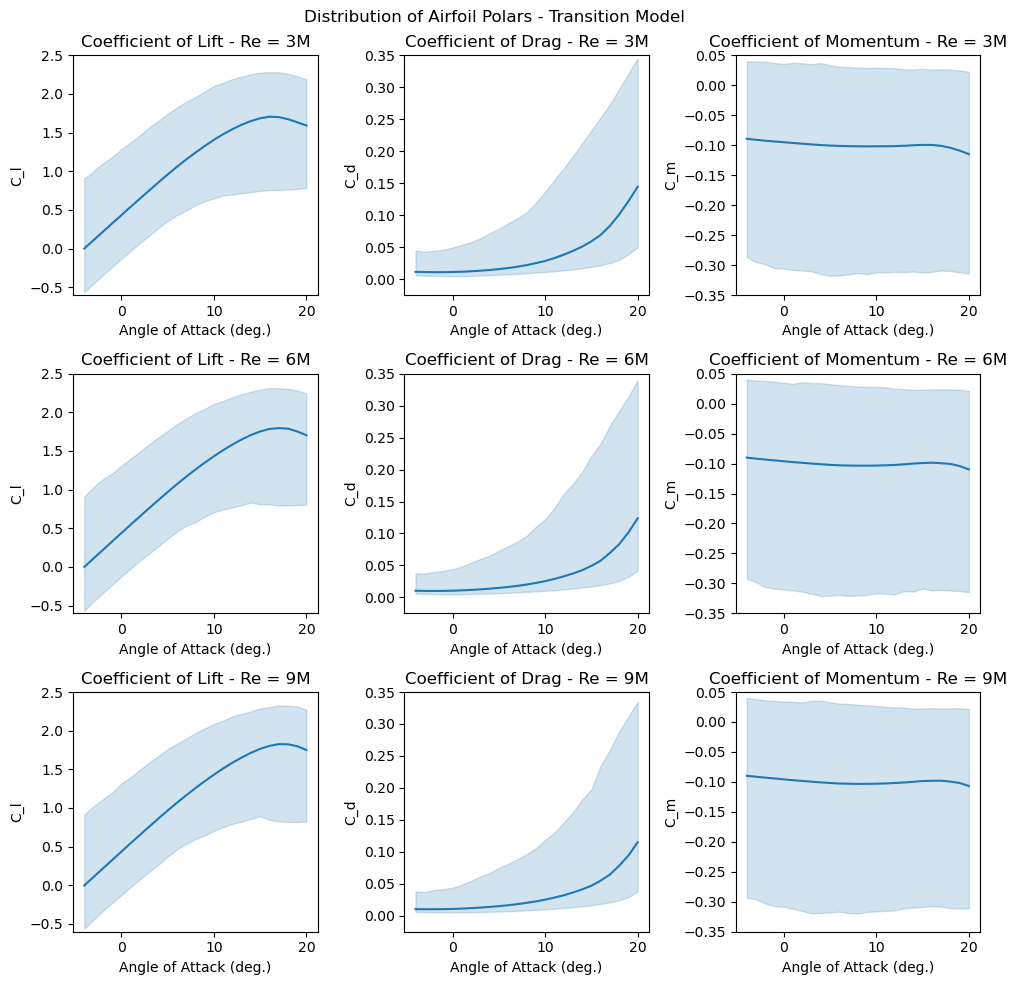

In [13]:
# Visualize distributions of coeffients of lift, drag, and moment as a function of angle of attack across all airfoils

plt.figure(figsize=(10, 10))

plt.subplot(331)
ax = sns.lineplot(data=cl_trans_Re3_1d, x=cl_trans_Re3_1d[:,0], y=cl_trans_Re3_1d[:,1], errorbar='pi', n_boot=(len(cl_trans_Re3_1d)))
plt.xlabel('Angle of Attack (deg.)')
plt.ylim(-0.6, 2.5)
plt.ylabel('C_l')
plt.title('Coefficient of Lift - Re = 3M')

plt.subplot(332)
ax = sns.lineplot(data=cd_trans_Re3_1d, x=cd_trans_Re3_1d[:,0], y=cd_trans_Re3_1d[:,1], errorbar='pi', n_boot=(len(cd_trans_Re3_1d)))
plt.xlabel('Angle of Attack (deg.)')
plt.ylim(-0.025, 0.35)
plt.ylabel('C_d')
plt.title('Coefficient of Drag - Re = 3M')

plt.subplot(333)
ax = sns.lineplot(data=cm_trans_Re3_1d, x=cm_trans_Re3_1d[:,0], y=cm_trans_Re3_1d[:,1], errorbar='pi', n_boot=(len(cm_trans_Re3_1d)))
plt.xlabel('Angle of Attack (deg.)')
plt.ylim(-0.35, 0.05)
plt.ylabel('C_m')
plt.title('Coefficient of Momentum - Re = 3M')


plt.subplot(334)
ax = sns.lineplot(data=cl_trans_Re6_1d, x=cl_trans_Re6_1d[:,0], y=cl_trans_Re6_1d[:,1], errorbar='pi', n_boot=(len(cl_trans_Re6_1d)))
plt.xlabel('Angle of Attack (deg.)')
plt.ylim(-0.6, 2.5)
plt.ylabel('C_l')
plt.title('Coefficient of Lift - Re = 6M')

plt.subplot(335)
ax = sns.lineplot(data=cd_trans_Re6_1d, x=cd_trans_Re6_1d[:,0], y=cd_trans_Re6_1d[:,1], errorbar='pi', n_boot=(len(cd_trans_Re6_1d)))
plt.xlabel('Angle of Attack (deg.)')
plt.ylim(-0.025, 0.35)
plt.ylabel('C_d')
plt.title('Coefficient of Drag - Re = 6M')

plt.subplot(336)
ax = sns.lineplot(data=cm_trans_Re6_1d, x=cm_trans_Re6_1d[:,0], y=cm_trans_Re6_1d[:,1], errorbar='pi', n_boot=(len(cm_trans_Re6_1d)))
plt.xlabel('Angle of Attack (deg.)')
plt.ylim(-0.35, 0.05)
plt.ylabel('C_m')
plt.title('Coefficient of Momentum - Re = 6M')


plt.subplot(337)
ax = sns.lineplot(data=cl_trans_Re9_1d, x=cl_trans_Re9_1d[:,0], y=cl_trans_Re9_1d[:,1], errorbar='pi', n_boot=(len(cl_trans_Re9_1d)))
plt.xlabel('Angle of Attack (deg.)')
plt.ylim(-0.6, 2.5)
plt.ylabel('C_l')
plt.title('Coefficient of Lift - Re = 9M')

plt.subplot(338)
ax = sns.lineplot(data=cd_trans_Re9_1d, x=cd_trans_Re9_1d[:,0], y=cd_trans_Re9_1d[:,1], errorbar='pi', n_boot=(len(cd_trans_Re9_1d)))
plt.xlabel('Angle of Attack (deg.)')
plt.ylim(-0.025, 0.35)
plt.ylabel('C_d')
plt.title('Coefficient of Drag - Re = 9M')

plt.subplot(339)
ax = sns.lineplot(data=cm_trans_Re9_1d, x=cm_trans_Re9_1d[:,0], y=cm_trans_Re9_1d[:,1], errorbar='pi', n_boot=(len(cm_trans_Re9_1d)))
plt.xlabel('Angle of Attack (deg.)')
plt.ylim(-0.35, 0.05)
plt.ylabel('C_m')
plt.title('Coefficient of Momentum - Re = 9M')

plt.suptitle('Distribution of Airfoil Polars - Transition Model')
plt.tight_layout()
plt.show()

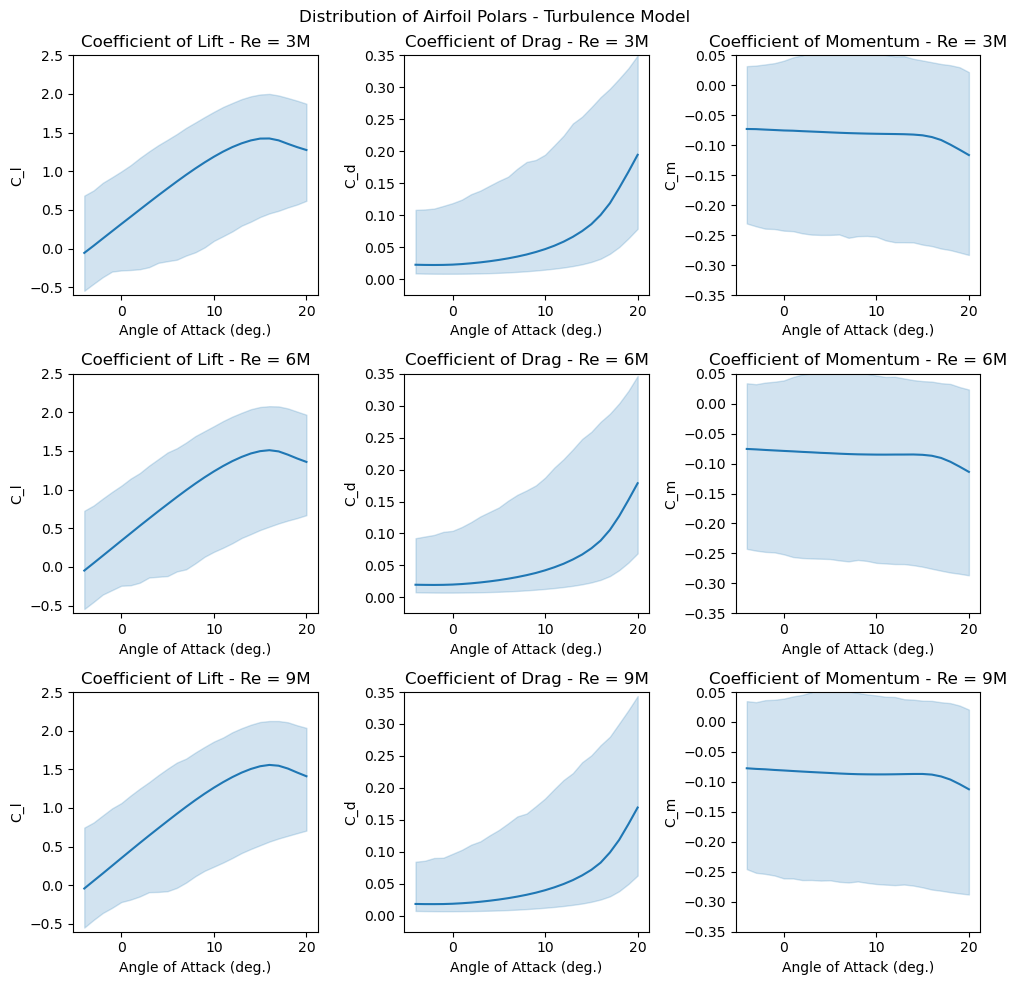

In [14]:
# Visualize distributions of coeffients of lift, drag, and moment as a function of angle of attack across all airfoils

plt.figure(figsize=(10, 10))

plt.subplot(331)
ax = sns.lineplot(data=cl_turb_Re3_1d, x=cl_turb_Re3_1d[:,0], y=cl_turb_Re3_1d[:,1], errorbar='pi', n_boot=(len(cl_turb_Re3_1d)))
plt.xlabel('Angle of Attack (deg.)')
plt.ylim(-0.6, 2.5)
plt.ylabel('C_l')
plt.title('Coefficient of Lift - Re = 3M')

plt.subplot(332)
ax = sns.lineplot(data=cd_turb_Re3_1d, x=cd_turb_Re3_1d[:,0], y=cd_turb_Re3_1d[:,1], errorbar='pi', n_boot=(len(cd_turb_Re3_1d)))
plt.xlabel('Angle of Attack (deg.)')
plt.ylim(-0.025, 0.35)
plt.ylabel('C_d')
plt.title('Coefficient of Drag - Re = 3M')

plt.subplot(333)
ax = sns.lineplot(data=cm_turb_Re3_1d, x=cm_turb_Re3_1d[:,0], y=cm_turb_Re3_1d[:,1], errorbar='pi', n_boot=(len(cm_turb_Re3_1d)))
plt.xlabel('Angle of Attack (deg.)')
plt.ylim(-0.35, 0.05)
plt.ylabel('C_m')
plt.title('Coefficient of Momentum - Re = 3M')


plt.subplot(334)
ax = sns.lineplot(data=cl_turb_Re6_1d, x=cl_turb_Re6_1d[:,0], y=cl_turb_Re6_1d[:,1], errorbar='pi', n_boot=(len(cl_turb_Re6_1d)))
plt.xlabel('Angle of Attack (deg.)')
plt.ylim(-0.6, 2.5)
plt.ylabel('C_l')
plt.title('Coefficient of Lift - Re = 6M')

plt.subplot(335)
ax = sns.lineplot(data=cd_turb_Re6_1d, x=cd_turb_Re6_1d[:,0], y=cd_turb_Re6_1d[:,1], errorbar='pi', n_boot=(len(cd_turb_Re6_1d)))
plt.xlabel('Angle of Attack (deg.)')
plt.ylim(-0.025, 0.35)
plt.ylabel('C_d')
plt.title('Coefficient of Drag - Re = 6M')

plt.subplot(336)
ax = sns.lineplot(data=cm_turb_Re6_1d, x=cm_turb_Re6_1d[:,0], y=cm_turb_Re6_1d[:,1], errorbar='pi', n_boot=(len(cm_turb_Re6_1d)))
plt.xlabel('Angle of Attack (deg.)')
plt.ylim(-0.35, 0.05)
plt.ylabel('C_m')
plt.title('Coefficient of Momentum - Re = 6M')


plt.subplot(337)
ax = sns.lineplot(data=cl_turb_Re9_1d, x=cl_turb_Re9_1d[:,0], y=cl_turb_Re9_1d[:,1], errorbar='pi', n_boot=(len(cl_turb_Re9_1d)))
plt.xlabel('Angle of Attack (deg.)')
plt.ylim(-0.6, 2.5)
plt.ylabel('C_l')
plt.title('Coefficient of Lift - Re = 9M')

plt.subplot(338)
ax = sns.lineplot(data=cd_turb_Re9_1d, x=cd_turb_Re9_1d[:,0], y=cd_turb_Re9_1d[:,1], errorbar='pi', n_boot=(len(cd_turb_Re9_1d)))
plt.xlabel('Angle of Attack (deg.)')
plt.ylim(-0.025, 0.35)
plt.ylabel('C_d')
plt.title('Coefficient of Drag - Re = 9M')

plt.subplot(339)
ax = sns.lineplot(data=cm_turb_Re9_1d, x=cm_turb_Re9_1d[:,0], y=cm_turb_Re9_1d[:,1], errorbar='pi', n_boot=(len(cm_turb_Re9_1d)))
plt.xlabel('Angle of Attack (deg.)')
plt.ylim(-0.35, 0.05)
plt.ylabel('C_m')
plt.title('Coefficient of Momentum - Re = 9M')

plt.suptitle('Distribution of Airfoil Polars - Turbulence Model')
plt.tight_layout()
plt.show()

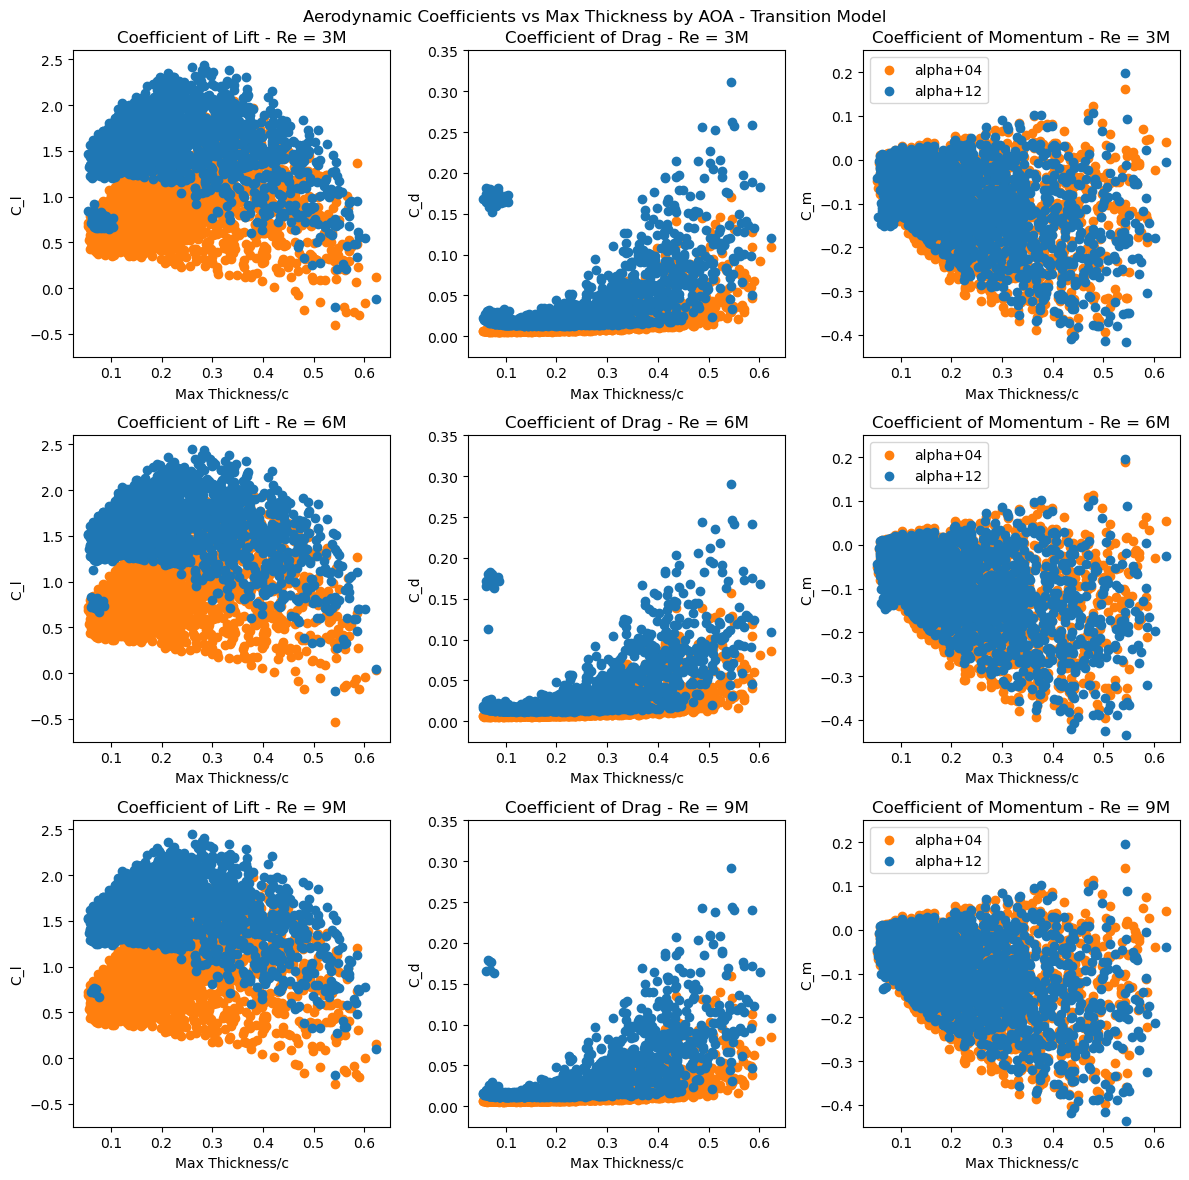

In [15]:
# Visualize distributions of coeffients of lift, drag, and moment as a function of angle of attack across all airfoils
plt.figure(figsize=(12, 12))

plt.subplot(331)
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cl_trans_Re3_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cl_trans_Re3_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Thickness/c')
plt.ylim(-0.75, 2.6)
plt.ylabel('C_l')
plt.title('Coefficient of Lift - Re = 3M')

plt.subplot(332)
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cd_trans_Re3_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cd_trans_Re3_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Thickness/c')
plt.ylim(-0.025, 0.35)
plt.ylabel('C_d')
plt.title('Coefficient of Drag - Re = 3M')

plt.subplot(333)
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cm_trans_Re3_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cm_trans_Re3_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Thickness/c')
plt.ylim(-0.45, 0.25)
plt.ylabel('C_m')
plt.title('Coefficient of Momentum - Re = 3M')
plt.legend(loc='upper left')


plt.subplot(334)
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cl_trans_Re6_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cl_trans_Re6_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Thickness/c')
plt.ylim(-0.75, 2.6)
plt.ylabel('C_l')
plt.title('Coefficient of Lift - Re = 6M')

plt.subplot(335)
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cd_trans_Re6_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cd_trans_Re6_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Thickness/c')
plt.ylim(-0.025, 0.35)
plt.ylabel('C_d')
plt.title('Coefficient of Drag - Re = 6M')

plt.subplot(336)
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cm_trans_Re6_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cm_trans_Re6_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Thickness/c')
plt.ylim(-0.45, 0.25)
plt.ylabel('C_m')
plt.title('Coefficient of Momentum - Re = 6M')
plt.legend(loc='upper left')

plt.subplot(337)
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cl_trans_Re9_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cl_trans_Re9_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Thickness/c')
plt.ylim(-0.75, 2.6)
plt.ylabel('C_l')
plt.title('Coefficient of Lift - Re = 9M')

plt.subplot(338)
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cd_trans_Re9_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cd_trans_Re9_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Thickness/c')
plt.ylim(-0.025, 0.35)
plt.ylabel('C_d')
plt.title('Coefficient of Drag - Re = 9M')

plt.subplot(339)
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cm_trans_Re9_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cm_trans_Re9_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Thickness/c')
plt.ylim(-0.45, 0.25)
plt.ylabel('C_m')
plt.title('Coefficient of Momentum - Re = 9M')
plt.legend(loc='upper left')


plt.suptitle('Aerodynamic Coefficients vs Max Thickness by AOA - Transition Model')
plt.tight_layout()
plt.show()

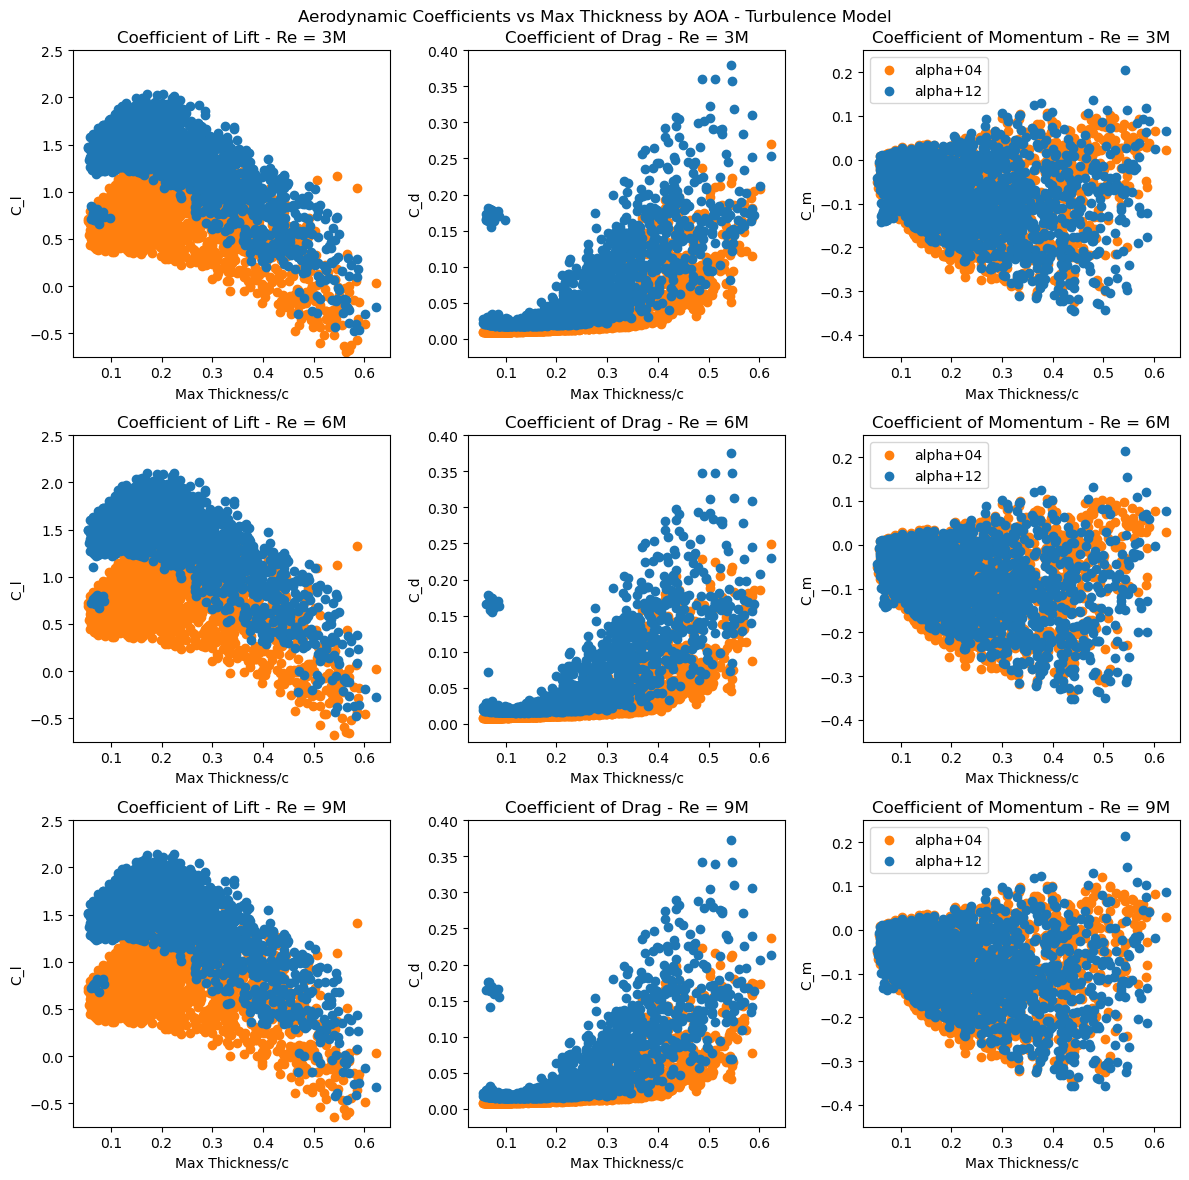

In [16]:
# Visualize distributions of coeffients of lift, drag, and moment as a function of angle of attack across all airfoils
plt.figure(figsize=(12, 12))

plt.subplot(331)
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cl_turb_Re3_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cl_turb_Re3_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Thickness/c')
plt.ylim(-0.75, 2.5)
plt.ylabel('C_l')
plt.title('Coefficient of Lift - Re = 3M')

plt.subplot(332)
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cd_turb_Re3_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cd_turb_Re3_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Thickness/c')
plt.ylim(-0.025, 0.4)
plt.ylabel('C_d')
plt.title('Coefficient of Drag - Re = 3M')

plt.subplot(333)
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cm_turb_Re3_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cm_turb_Re3_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Thickness/c')
plt.ylim(-0.45, 0.25)
plt.ylabel('C_m')
plt.title('Coefficient of Momentum - Re = 3M')
plt.legend(loc='upper left')


plt.subplot(334)
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cl_turb_Re6_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cl_turb_Re6_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Thickness/c')
plt.ylim(-0.75, 2.5)
plt.ylabel('C_l')
plt.title('Coefficient of Lift - Re = 6M')

plt.subplot(335)
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cd_turb_Re6_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cd_turb_Re6_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Thickness/c')
plt.ylim(-0.025, 0.4)
plt.ylabel('C_d')
plt.title('Coefficient of Drag - Re = 6M')

plt.subplot(336)
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cm_turb_Re6_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cm_turb_Re6_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Thickness/c')
plt.ylim(-0.45, 0.25)
plt.ylabel('C_m')
plt.title('Coefficient of Momentum - Re = 6M')
plt.legend(loc='upper left')

plt.subplot(337)
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cl_turb_Re9_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cl_turb_Re9_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Thickness/c')
plt.ylim(-0.75, 2.5)
plt.ylabel('C_l')
plt.title('Coefficient of Lift - Re = 9M')

plt.subplot(338)
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cd_turb_Re9_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cd_turb_Re9_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Thickness/c')
plt.ylim(-0.025, 0.4)
plt.ylabel('C_d')
plt.title('Coefficient of Drag - Re = 9M')

plt.subplot(339)
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cm_turb_Re9_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(thickness_arr_2d, axis=1), y=cm_turb_Re9_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Thickness/c')
plt.ylim(-0.45, 0.25)
plt.ylabel('C_m')
plt.title('Coefficient of Momentum - Re = 9M')
plt.legend(loc='upper left')


plt.suptitle('Aerodynamic Coefficients vs Max Thickness by AOA - Turbulence Model')
plt.tight_layout()
plt.show()

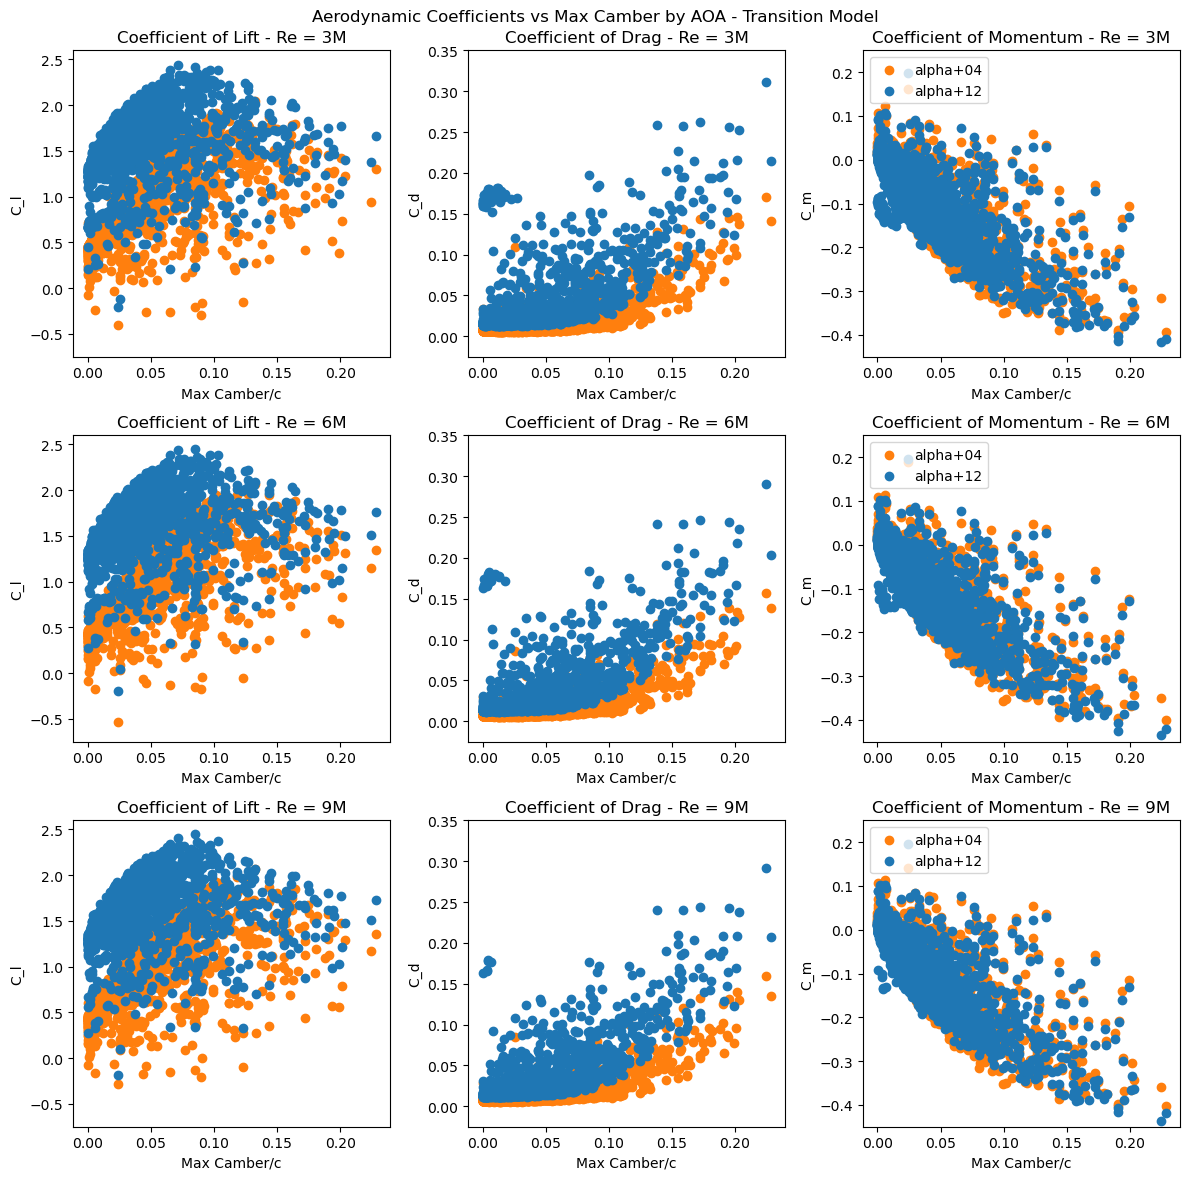

In [17]:
# Visualize distributions of coeffients of lift, drag, and moment as a function of angle of attack across all airfoils
plt.figure(figsize=(12, 12))

plt.subplot(331)
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cl_trans_Re3_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cl_trans_Re3_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Camber/c')
plt.ylim(-0.75, 2.6)
plt.ylabel('C_l')
plt.title('Coefficient of Lift - Re = 3M')

plt.subplot(332)
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cd_trans_Re3_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cd_trans_Re3_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Camber/c')
plt.ylim(-0.025, 0.35)
plt.ylabel('C_d')
plt.title('Coefficient of Drag - Re = 3M')

plt.subplot(333)
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cm_trans_Re3_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cm_trans_Re3_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Camber/c')
plt.ylim(-0.45, 0.25)
plt.ylabel('C_m')
plt.title('Coefficient of Momentum - Re = 3M')
plt.legend(loc='upper left')


plt.subplot(334)
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cl_trans_Re6_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cl_trans_Re6_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Camber/c')
plt.ylim(-0.75, 2.6)
plt.ylabel('C_l')
plt.title('Coefficient of Lift - Re = 6M')

plt.subplot(335)
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cd_trans_Re6_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cd_trans_Re6_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Camber/c')
plt.ylim(-0.025, 0.35)
plt.ylabel('C_d')
plt.title('Coefficient of Drag - Re = 6M')

plt.subplot(336)
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cm_trans_Re6_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cm_trans_Re6_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Camber/c')
plt.ylim(-0.45, 0.25)
plt.ylabel('C_m')
plt.title('Coefficient of Momentum - Re = 6M')
plt.legend(loc='upper left')

plt.subplot(337)
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cl_trans_Re9_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cl_trans_Re9_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Camber/c')
plt.ylim(-0.75, 2.6)
plt.ylabel('C_l')
plt.title('Coefficient of Lift - Re = 9M')

plt.subplot(338)
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cd_trans_Re9_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cd_trans_Re9_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Camber/c')
plt.ylim(-0.025, 0.35)
plt.ylabel('C_d')
plt.title('Coefficient of Drag - Re = 9M')

plt.subplot(339)
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cm_trans_Re9_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cm_trans_Re9_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Camber/c')
plt.ylim(-0.45, 0.25)
plt.ylabel('C_m')
plt.title('Coefficient of Momentum - Re = 9M')
plt.legend(loc='upper left')


plt.suptitle('Aerodynamic Coefficients vs Max Camber by AOA - Transition Model')
plt.tight_layout()
plt.show()

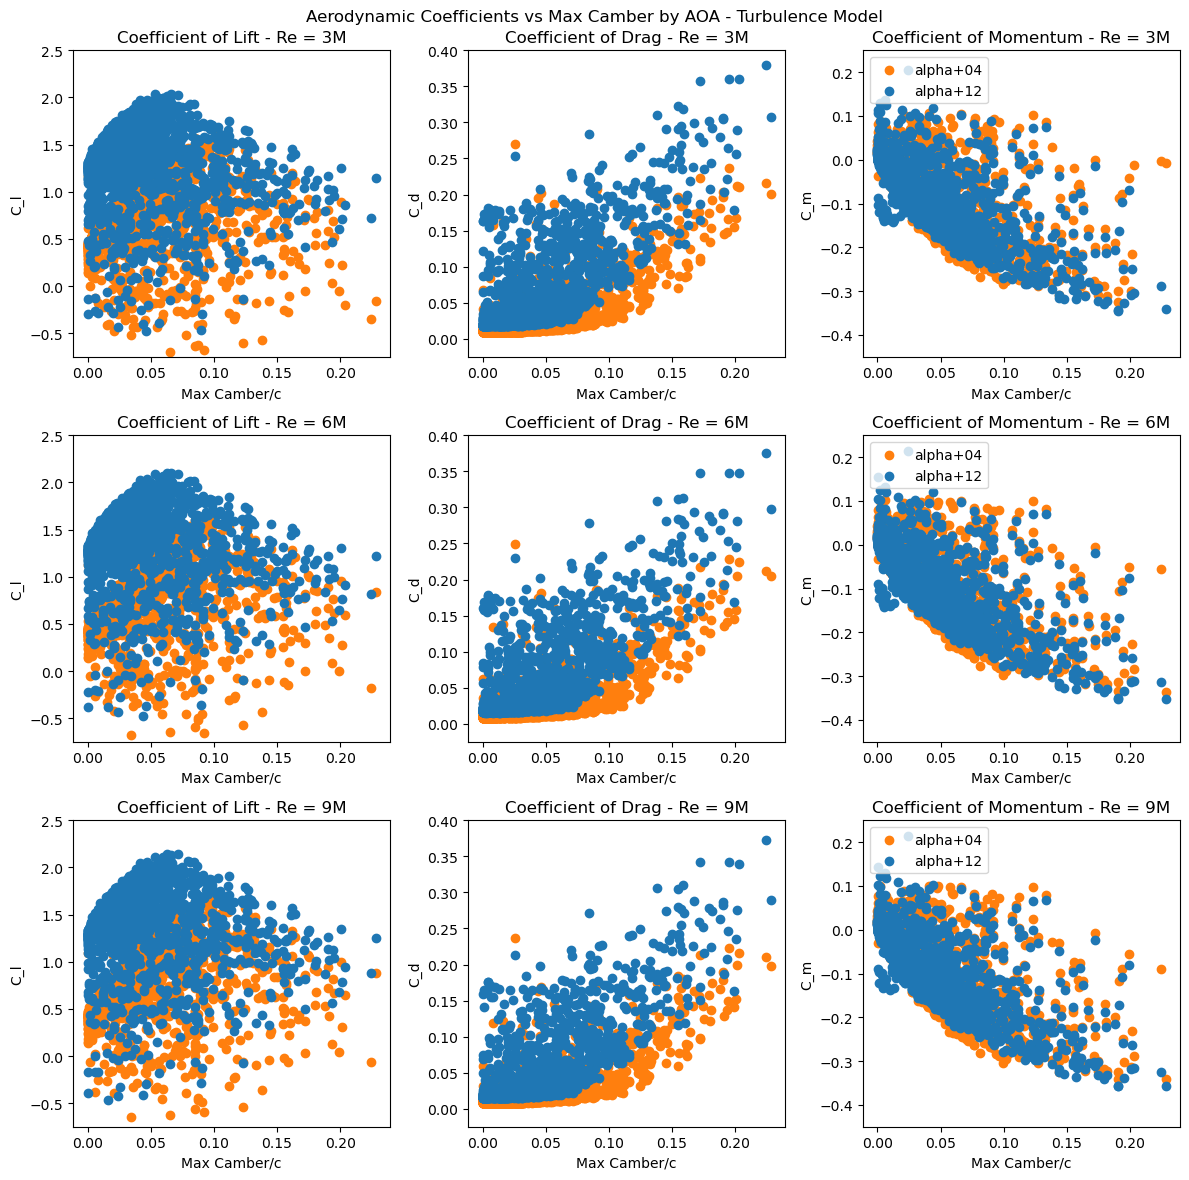

In [18]:
# Visualize distributions of coeffients of lift, drag, and moment as a function of angle of attack across all airfoils
plt.figure(figsize=(12, 12))

plt.subplot(331)
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cl_turb_Re3_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cl_turb_Re3_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Camber/c')
plt.ylim(-0.75, 2.5)
plt.ylabel('C_l')
plt.title('Coefficient of Lift - Re = 3M')

plt.subplot(332)
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cd_turb_Re3_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cd_turb_Re3_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Camber/c')
plt.ylim(-0.025, 0.4)
plt.ylabel('C_d')
plt.title('Coefficient of Drag - Re = 3M')

plt.subplot(333)
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cm_turb_Re3_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cm_turb_Re3_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Camber/c')
plt.ylim(-0.45, 0.25)
plt.ylabel('C_m')
plt.title('Coefficient of Momentum - Re = 3M')
plt.legend(loc='upper left')


plt.subplot(334)
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cl_turb_Re6_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cl_turb_Re6_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Camber/c')
plt.ylim(-0.75, 2.5)
plt.ylabel('C_l')
plt.title('Coefficient of Lift - Re = 6M')

plt.subplot(335)
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cd_turb_Re6_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cd_turb_Re6_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Camber/c')
plt.ylim(-0.025, 0.4)
plt.ylabel('C_d')
plt.title('Coefficient of Drag - Re = 6M')

plt.subplot(336)
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cm_turb_Re6_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cm_turb_Re6_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Camber/c')
plt.ylim(-0.45, 0.25)
plt.ylabel('C_m')
plt.title('Coefficient of Momentum - Re = 6M')
plt.legend(loc='upper left')

plt.subplot(337)
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cl_turb_Re9_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cl_turb_Re9_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Camber/c')
plt.ylim(-0.75, 2.5)
plt.ylabel('C_l')
plt.title('Coefficient of Lift - Re = 9M')

plt.subplot(338)
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cd_turb_Re9_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cd_turb_Re9_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Camber/c')
plt.ylim(-0.025, 0.4)
plt.ylabel('C_d')
plt.title('Coefficient of Drag - Re = 9M')

plt.subplot(339)
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cm_turb_Re9_2d[:,8], c='tab:orange', label='alpha+04')
ax = plt.scatter(x=np.max(camber_arr_2d, axis=1), y=cm_turb_Re9_2d[:,16], c='tab:blue', label='alpha+12')
plt.xlabel('Max Camber/c')
plt.ylim(-0.45, 0.25)
plt.ylabel('C_m')
plt.title('Coefficient of Momentum - Re = 9M')
plt.legend(loc='upper left')

plt.suptitle('Aerodynamic Coefficients vs Max Camber by AOA - Turbulence Model')
plt.tight_layout()
plt.show()

## Dimension Reduction of Parameterizations

--------------------------------------------------
Number of Components = 1
Explained Variance:
[8.05916655]
--------------------------------------------------
Number of Components = 2
Explained Variance:
[8.05916655 6.84771098]
--------------------------------------------------
Number of Components = 3
Explained Variance:
[8.05916655 6.84771098 2.13457931]
--------------------------------------------------
Number of Components = 4
Explained Variance:
[8.05916655 6.84771098 2.13457931 1.15367172]
--------------------------------------------------
Number of Components = 5
Explained Variance:
[8.05916655 6.84771098 2.13457931 1.15367172 0.38022076]
--------------------------------------------------
Number of Components = 6
Explained Variance:
[8.05916655 6.84771098 2.13457931 1.15367172 0.38022076 0.29739101]


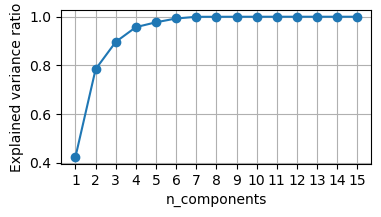

In [19]:
## Explore the PCA space of the cst data
# Aim to reduce cst data down to same dimensionality as the grassmann data (1830, 6)
# Standardize the data with zero mean and unity variance
std_scaler = StandardScaler()
cst_std = std_scaler.fit_transform(cst)

# Loop through all possible # of components for the PCA given the shape of the data
n_comps = np.arange(15)+1
var_ratio = []
for i in n_comps:
    pca = PCA(n_components=i)
    pca.fit(cst_std)
    # Capture explained variance ratio for visualizations
    var_ratio.append(np.sum(pca.explained_variance_ratio_))
    # print explained variance for n_components < 6
    if i < 7 :
        print("--------------------------------------------------")
        print("Number of Components =", i)
        print("Explained Variance:")
        print(pca.explained_variance_)

plt.figure(figsize=(4,2))
plt.grid()
plt.plot(n_comps,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.xticks([int(i) for i in n_comps])

plt.show()

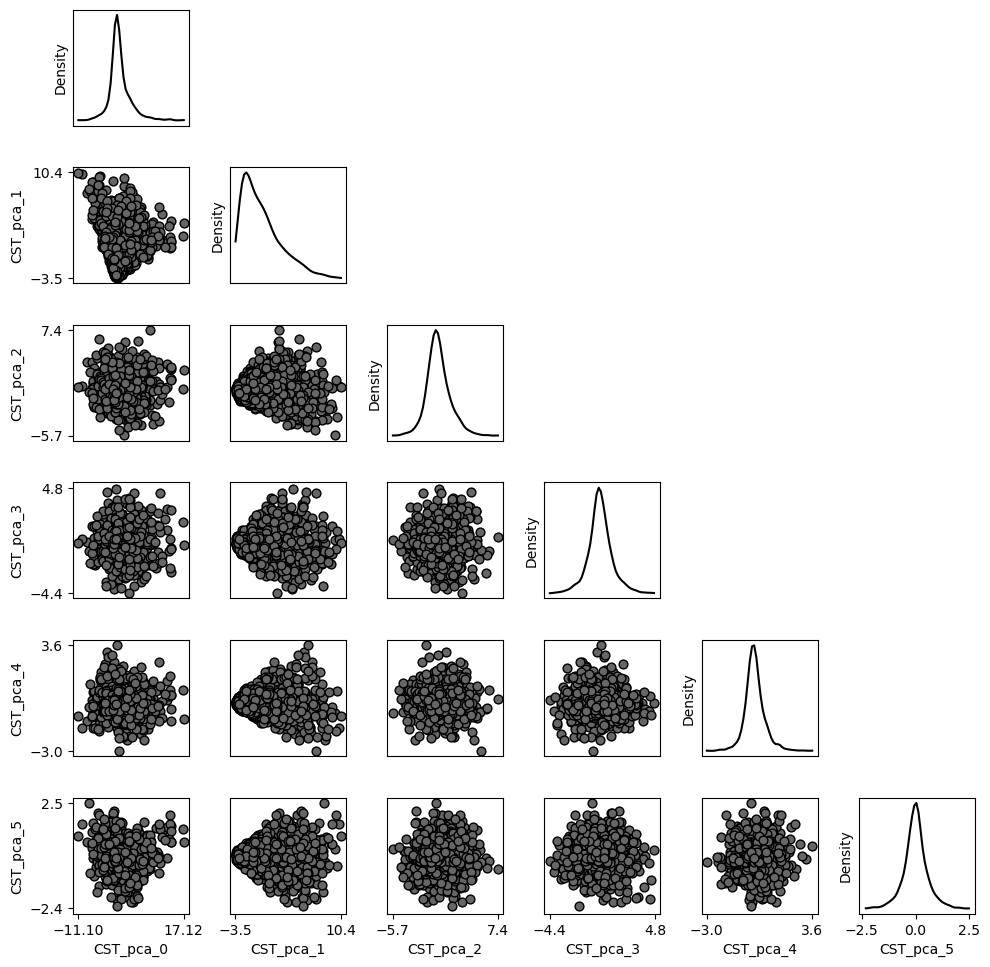

In [20]:
# Transform standardized cst data to (1830, 6) via PCA
pca = PCA(n_components=6)
cst_pca = pca.fit_transform(cst_std)

## Visualize distributions of CST parameters
# Capture number of parameters in CST representation
m = cst_pca.shape[1]
# Create list to hold upper and lower limits for visualizations
cst_limits = []
for i in range(m):
    # Capture min and max values in each CST parameter across all airfoils
    lower = cst_pca[:,i].min()
    upper = cst_pca[:,i].max()
    # determine position of first non-zero digit after the decimal place, perform ceiling and floor rounding to that precision
    lower = rounders.floor(lower,(abs(int(math.log10(abs(lower))))+1))
    upper = rounders.ceil(upper,(abs(int(math.log10(abs(upper))))+1))
    # append parameter lower and upper limits to list
    cst_limits.append([lower,upper])

# Create labels for CST parameters
cst_labels = ['CST_pca_{}'.format(i) for i in range(int((m)))]


# Plot marginal distributions of the CST data
plt.figure(figsize=(10,10))
for i in range(m):
    for j in range(i+1):
        plt.subplot(m, m, (m*i)+j+1)
        if i == j:
            vals = np.linspace(cst_pca[:,i].min(), cst_pca[:,i].max())
            kde = gaussian_kde(cst_pca[:,i])
            plt.plot(vals,kde(vals),'k')
            plt.xlim(cst_limits[i][0]-0.05*np.ptp(cst_limits[i]),
                     cst_limits[i][-1]+0.05*np.ptp(cst_limits[i]))
            plt.yticks([])
            plt.ylabel('Density')
        
            if i == (m-1):
                plt.xlabel(cst_labels[j], fontsize=10)
            else:
                plt.xticks([])

        else:
            plt.scatter(cst_pca[:,j], cst_pca[:,i], s=40, c=[[0.4,0.4,0.4]], edgecolor='k')
            plt.xticks(cst_limits[j])
            plt.yticks(cst_limits[i])
            
            if i == (m-1):
                plt.xlabel(cst_labels[j], fontsize=10)
            else:
                plt.xticks([])
            if j == 0:
                plt.ylabel(cst_labels[i], fontsize=10)
            else:
                plt.yticks([])
            plt.xlim(cst_limits[j][0]-0.05*np.ptp(cst_limits[j]), 
                     cst_limits[j][-1]+0.05*np.ptp(cst_limits[j]))
            plt.ylim(cst_limits[i][0]-0.05*np.ptp(cst_limits[i]), 
                     cst_limits[i][-1]+0.05*np.ptp(cst_limits[i]))

        xlim = plt.gca().get_xlim()
        ylim = plt.gca().get_ylim()
        plt.gca().set_aspect((xlim[1] - xlim[0])/(ylim[1] - ylim[0]))
plt.tight_layout()
plt.show()


--------------------------------------------------
Number of Components = 1
Explained Variance:
[8.58136703]
--------------------------------------------------
Number of Components = 2
Explained Variance:
[8.58136703 2.9580131 ]
--------------------------------------------------
Number of Components = 3
Explained Variance:
[8.58136703 2.9580131  1.68592807]
--------------------------------------------------
Number of Components = 4
Explained Variance:
[8.58136703 2.9580131  1.68592807 1.00666987]
--------------------------------------------------
Number of Components = 5
Explained Variance:
[8.58136703 2.9580131  1.68592807 1.00666987 0.38429803]
--------------------------------------------------
Number of Components = 6
Explained Variance:
[8.58136703 2.9580131  1.68592807 1.00666987 0.38429803 0.37313591]


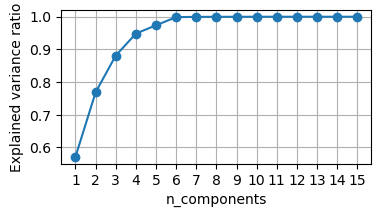

In [21]:
## Explore the PCA space of the bezier data
# Aim to reduce bezier data down to same dimensionality as the grassmann data (1830, 6)
# Standardize the data with zero mean and unity variance
std_scaler = StandardScaler()
bezier_std = std_scaler.fit_transform(bezier)

# Loop through all possible # of components for the PCA given the shape of the data
n_comps = np.arange(15)+1
var_ratio = []
for i in n_comps:
    pca = PCA(n_components=i)
    pca.fit(bezier_std)
    # Capture explained variance ratio for visualizations
    var_ratio.append(np.sum(pca.explained_variance_ratio_))
    # print explained variance for n_components < 6
    if i < 7 :
        print("--------------------------------------------------")
        print("Number of Components =", i)
        print("Explained Variance:")
        print(pca.explained_variance_)

plt.figure(figsize=(4,2))
plt.grid()
plt.plot(n_comps,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.xticks([int(i) for i in n_comps])

plt.show()

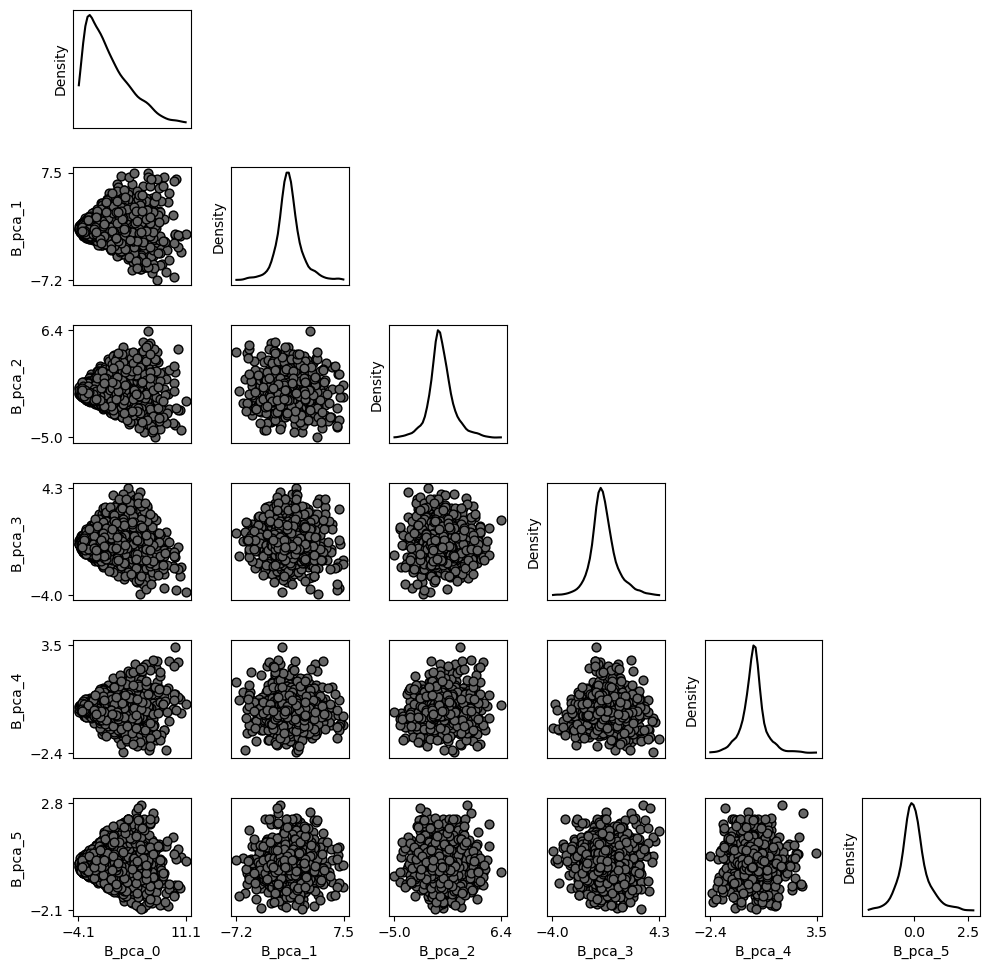

In [22]:
# Transform standardized bezier data to (1830, 6) via PCA
pca = PCA(n_components=6)
bezier_pca = pca.fit_transform(bezier_std)


## Visualize distributions of PCA Bezier curve parameters
# Capture number of parameters in bezier representation
m = bezier_pca.shape[1]
# Create list to hold upper and lower limits for visualizations
bezier_limits = []
for i in range(m):
    # Capture min and max values in each bezier parameter across all airfoils
    lower = bezier_pca[:,i].min()
    upper = bezier_pca[:,i].max()
    # determine position of first non-zero digit after the decimal place, perform ceiling and floor rounding to that precision
    lower = rounders.floor(lower,(abs(int(math.log10(abs(lower))))+1))
    upper = rounders.ceil(upper,(abs(int(math.log10(abs(upper))))+1))
    # append parameter lower and upper limits to list
    bezier_limits.append([lower,upper])

# Create labels for bezier parameters
bezier_labels = ['B_pca_{}'.format(i) for i in range(int((m)))]

# Plot marginal distributions of the bezier data
plt.figure(figsize=(10,10))
for i in range(m):
    for j in range(i+1):
        plt.subplot(m, m, (m*i)+j+1)
        if i == j:
            vals = np.linspace(bezier_pca[:,i].min(), bezier_pca[:,i].max())
            kde = gaussian_kde(bezier_pca[:,i])
            plt.plot(vals,kde(vals),'k')
            plt.xlim(bezier_limits[i][0]-0.05*np.ptp(bezier_limits[i]),
                     bezier_limits[i][-1]+0.05*np.ptp(bezier_limits[i]))
            plt.yticks([])
            plt.ylabel('Density')
        
            if i == (m-1):
                plt.xlabel(bezier_labels[j], fontsize=10)
            else:
                plt.xticks([])

        else:
            plt.scatter(bezier_pca[:,j], bezier_pca[:,i], s=40, c=[[0.4,0.4,0.4]], edgecolor='k')
            plt.xticks(bezier_limits[j])
            plt.yticks(bezier_limits[i])
            
            if i == (m-1):
                plt.xlabel(bezier_labels[j], fontsize=10)
            else:
                plt.xticks([])
            if j == 0:
                plt.ylabel(bezier_labels[i], fontsize=10)
            else:
                plt.yticks([])
            plt.xlim(bezier_limits[j][0]-0.05*np.ptp(bezier_limits[j]), 
                     bezier_limits[j][-1]+0.05*np.ptp(bezier_limits[j]))
            plt.ylim(bezier_limits[i][0]-0.05*np.ptp(bezier_limits[i]), 
                     bezier_limits[i][-1]+0.05*np.ptp(bezier_limits[i]))

        xlim = plt.gca().get_xlim()
        ylim = plt.gca().get_ylim()
        plt.gca().set_aspect((xlim[1] - xlim[0])/(ylim[1] - ylim[0]))
plt.tight_layout()
plt.show()


## Examine Flow Field Data

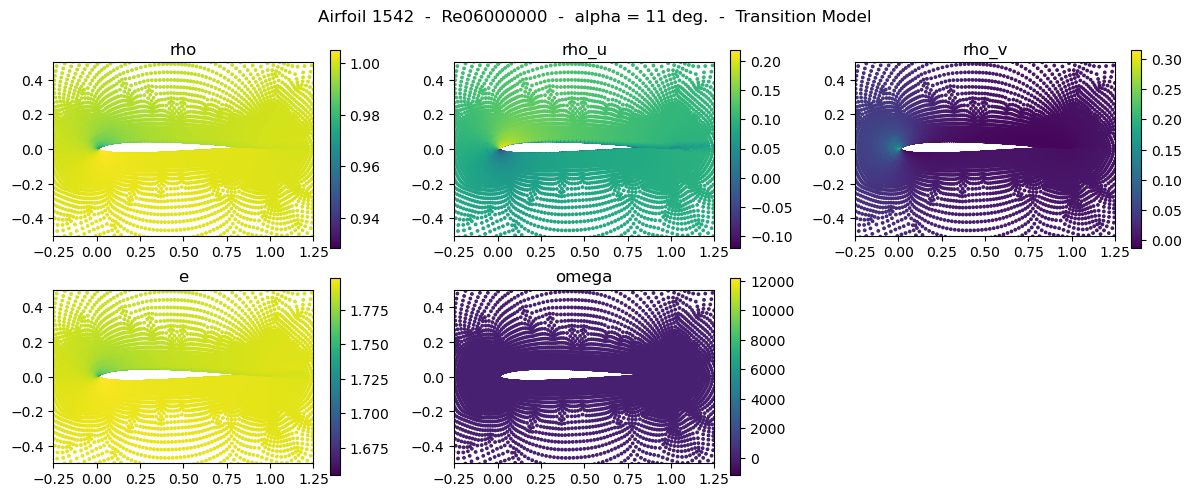

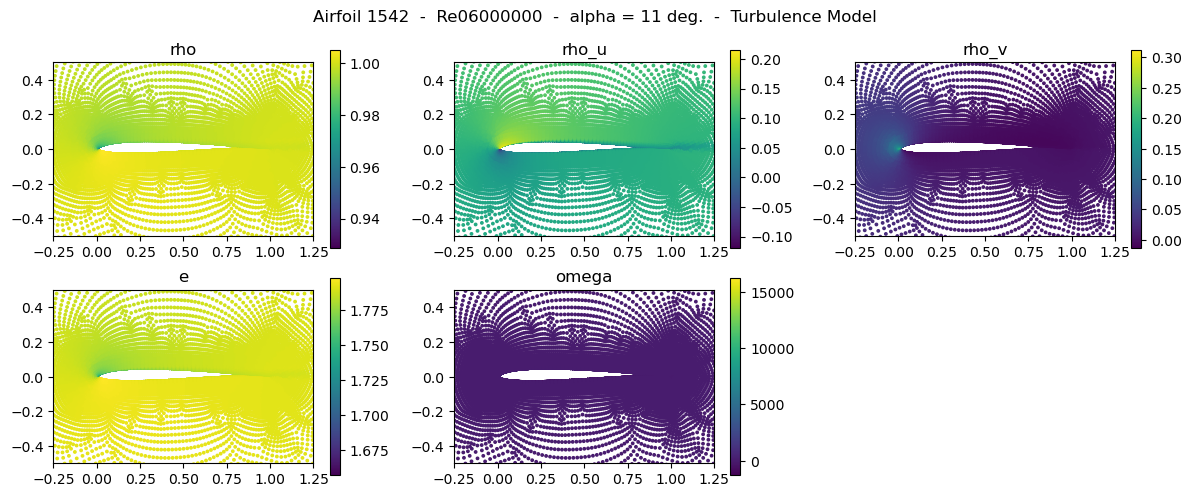

In [23]:
# Plot flow field data for randomly selected airfoils

val_list = ['rho', 'rho_u', 'rho_v', 'e', 'omega']

with h5py.File(data_path, 'r') as hf:
    
    af_idx = np.random.randint(hf['shape']['landmarks'].shape[0])
    Re = np.random.choice(['Re03000000', 'Re06000000', 'Re09000000'])
    aoa = np.random.randint(-4, 21)
    
    x = hf['trans_model'][Re]['flow_field']['{:04d}'.format(af_idx)]['x'][:, int(aoa+4)]
    y = hf['trans_model'][Re]['flow_field']['{:04d}'.format(af_idx)]['y'][:, int(aoa+4)]
    
    plt.figure(figsize=(12, 5))
    for i, v in enumerate(val_list):
        val = hf['trans_model'][Re]['flow_field']['{:04d}'.format(af_idx)][v][:, int(aoa+4)]
        
        tf = (x >= -0.25) & (x <= 1.25) & (y >= -0.5) & (y <= 0.5)
        vmin, vmax = np.min(val[tf]), np.max(val[tf])
    
        plt.subplot(2, 3, i+1)
        plt.scatter(x, y, c=val, vmin=vmin, vmax=vmax, s=3)
        plt.xlim(-0.25, 1.25)
        plt.ylim(-0.5, 0.5)
        plt.colorbar()
        plt.title(v)
        plt.gca().set_aspect(1.)

    plt.suptitle('Airfoil {:04d}  -  {}  -  alpha = {} deg.  -  Transition Model'.format(af_idx, Re, aoa))
    plt.tight_layout()
    plt.show()
    
    x = hf['turb_model'][Re]['flow_field']['{:04d}'.format(af_idx)]['x'][:, int(aoa+4)]
    y = hf['turb_model'][Re]['flow_field']['{:04d}'.format(af_idx)]['y'][:, int(aoa+4)]
    
    plt.figure(figsize=(12, 5))
    for i, v in enumerate(val_list):
        val = hf['turb_model'][Re]['flow_field']['{:04d}'.format(af_idx)][v][:, int(aoa+4)]
        
        tf = (x >= -0.25) & (x <= 1.25) & (y >= -0.5) & (y <= 0.5)
        vmin, vmax = np.min(val[tf]), np.max(val[tf])
    
        plt.subplot(2, 3, i+1)
        plt.scatter(x, y, c=val, vmin=vmin, vmax=vmax, s=3)
        plt.xlim(-0.25, 1.25)
        plt.ylim(-0.5, 0.5)
        plt.colorbar()
        plt.title(v)
        plt.gca().set_aspect(1.)

    plt.suptitle('Airfoil {:04d}  -  {}  -  alpha = {} deg.  -  Turbulence Model'.format(af_idx, Re, aoa))
    plt.tight_layout()
    plt.show()